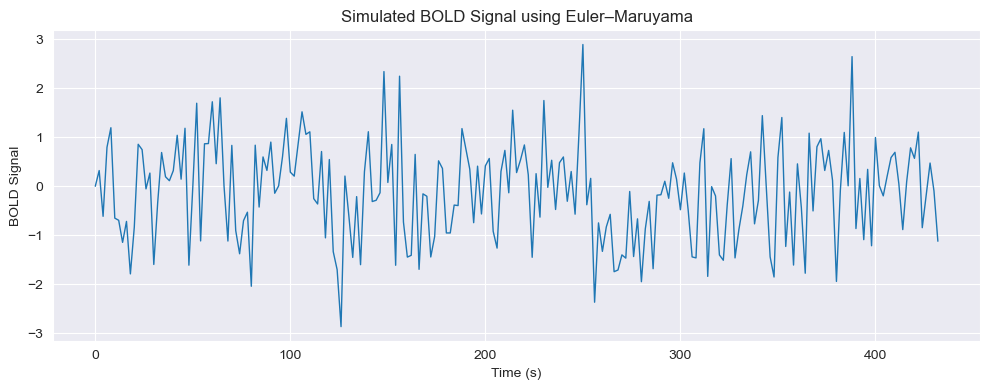

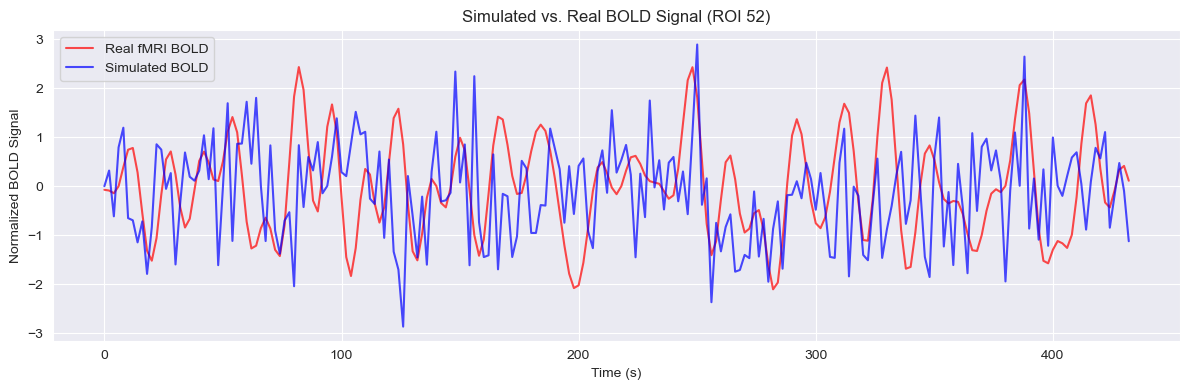

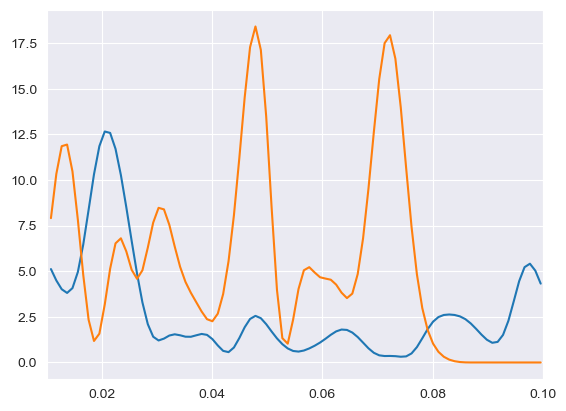

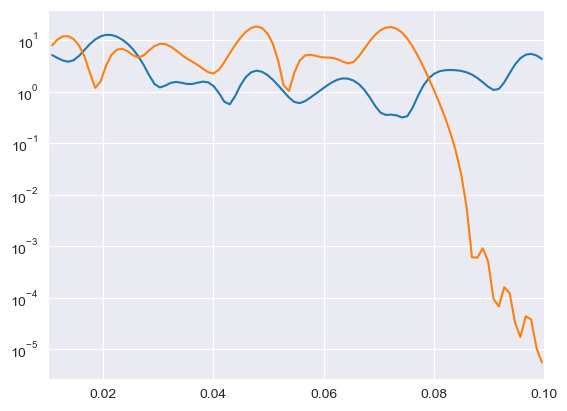

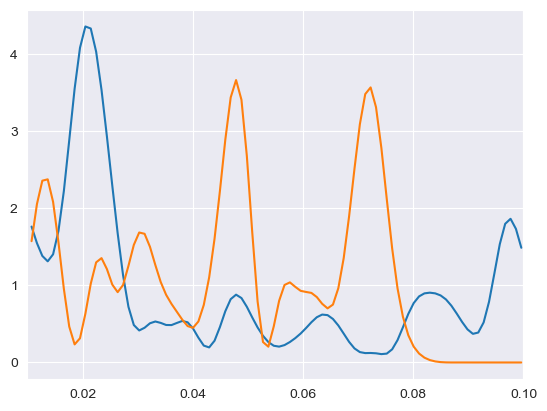

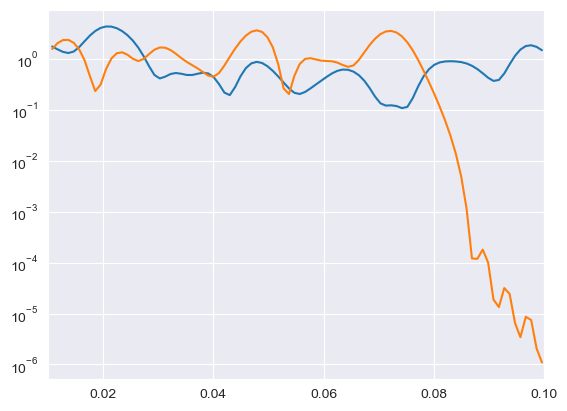

In [ ]:
from helper_functions import normalise_data, filter_frequencies, load_single_time_series
from matplotlib import pyplot as plt
from havlicek.euler_maruyama.euler_maruyama import simulate_bold_euler_maruyama
import numpy as np
from PDCMBOLDModel import PDCMMODEL
import torch

# Simulation parameters
T = 434          # Total simulation time in seconds
h = 0.01         # Integration time step (100 Hz simulation)
time = np.arange(0, T, h)


alpha_v, beta_v = 30, 0.9843176162940256  # State noise parameters
alpha_e, beta_e = 0.1, 0.001 # Observation noise parameters
desired_TR = 2      # Downsample to match a TR of 2 seconds

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = PDCMMODEL(
        ignore_range=True,
        phi=1.1022929322631665, varphi=0.4471852052681997,
        chi=0.6355161842578786, tMTT=2.8763686016254786, tau=0.5767567098236397,
        sigma=1.7545325268117755, mu=1.4894543100836501, lamb=0.06610651141507853,
        device=device
    )

# Simulate the BOLD signal
downsampled_time, downsampled_bold = simulate_bold_euler_maruyama(
    model=model,
    time=time,
    h=h,
    alpha_v=alpha_v,
    beta_v=beta_v,
    alpha_e=alpha_e,
    beta_e=beta_e,
    desired_TR=desired_TR,
    add_state_noise=True,
    add_obs_noise=True,
)

downsampled_bold = normalise_data(downsampled_bold)

# Plot the downsampled BOLD signal
plt.figure(figsize=(10, 4))
plt.plot(downsampled_time.detach().numpy(), downsampled_bold.detach().numpy(), lw=1)
plt.xlabel('Time (s)')
plt.ylabel('BOLD Signal')
plt.title('Simulated BOLD Signal using Euler–Maruyama')
plt.tight_layout()
plt.show()

from scipy_to_torch import torch_csd

bold_tensor = downsampled_bold.detach()  # already a tensor, just ensure detached from graph
f, psd = torch_csd(bold_tensor, bold_tensor, fs=0.5, nperseg=128, nfft=512)

f, psd = filter_frequencies(f, psd, 0.01, 0.1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# === Load Data ===
region_index = 52
exp = "LSD"
file = f"/Users/xuenbei/Desktop/finalyearproject/time_series/sub-002-{exp}-ROI{region_index}.txt"
observed_bold = torch.tensor(load_single_time_series(file), dtype=torch.float32, device=device)

observed_bold = normalise_data(observed_bold)

# === Match lengths by truncating the longer signal ===
min_len = min(len(observed_bold), len(downsampled_bold))
sim_bold_plot = downsampled_bold[:min_len].detach().cpu().numpy()
real_bold_plot = observed_bold[:min_len].detach().cpu().numpy()
time_axis = downsampled_time[:min_len].detach().cpu().numpy()

plt.figure(figsize=(12, 4))
plt.plot(time_axis, real_bold_plot, label="Real fMRI BOLD", color='red', alpha=0.7)
plt.plot(time_axis, sim_bold_plot, label="Simulated BOLD", color='blue', alpha=0.7)
plt.xlabel("Time (s)")
plt.ylabel("Normalised BOLD Signal")
plt.title(f"Simulated vs. Real BOLD Signal (ROI {region_index})")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

real_freqs, real_psd = torch_csd(observed_bold, observed_bold, fs=0.5, nperseg=128, nfft=512)
real_freqs, real_psd = filter_frequencies(real_freqs, real_psd, min_freq=0.01, max_freq=0.1)

plt.plot(f, psd)
plt.plot(real_freqs, real_psd)
plt.xlim(0.01, 0.1)
plt.show()

plt.semilogy(f, psd)
plt.semilogy(real_freqs, real_psd)
plt.xlim(0.01, 0.1)
plt.show()

psd = psd/psd.std()
real_psd = real_psd/real_psd.std()

plt.plot(f, psd)
plt.plot(real_freqs, real_psd)
plt.xlim(0.01, 0.1)
plt.show()

plt.semilogy(f, psd)
plt.semilogy(real_freqs, real_psd)
plt.xlim(0.01, 0.1)
plt.show()

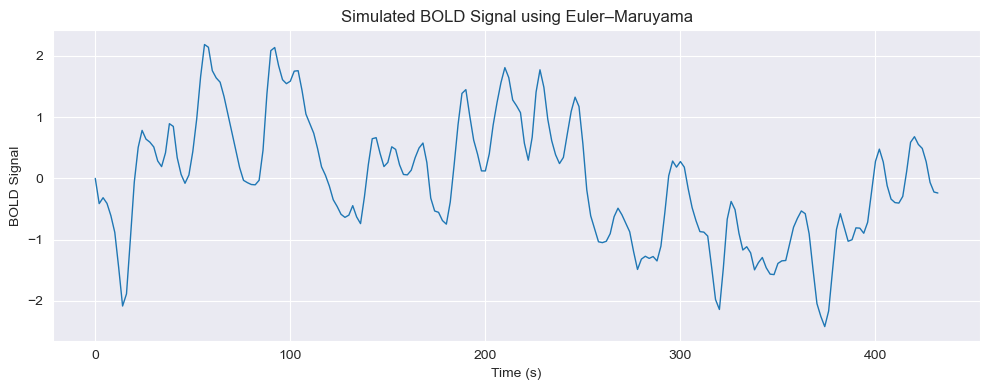

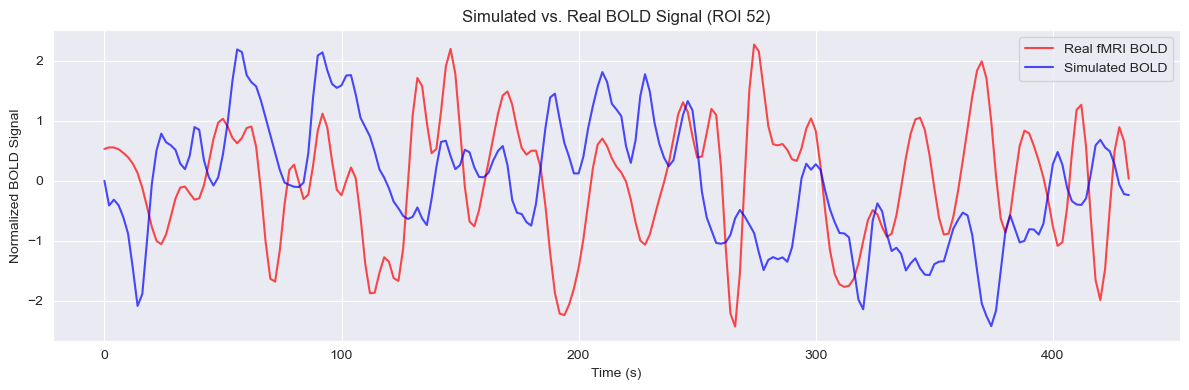

/Users/xuenbei/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/xuenbei/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


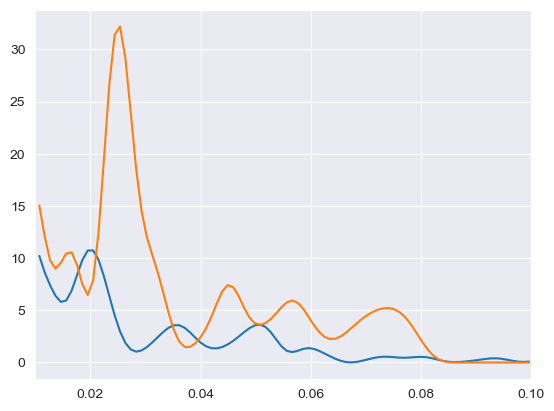

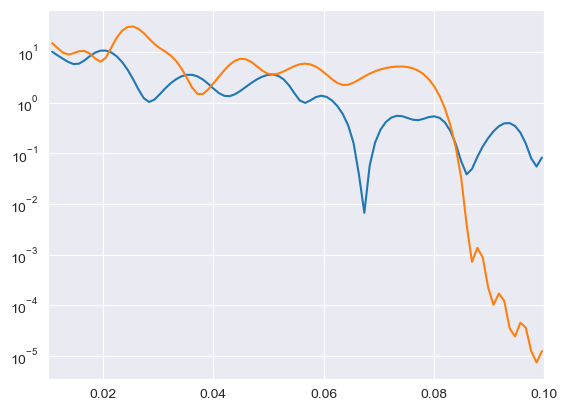

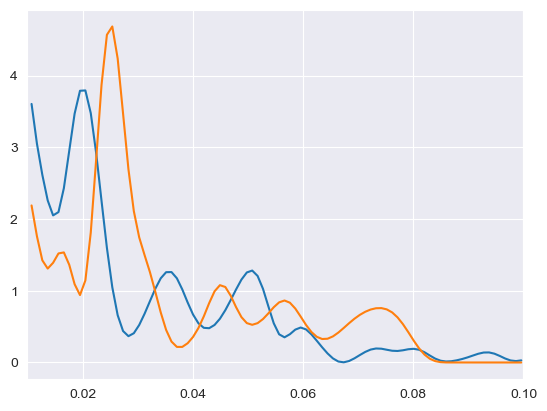

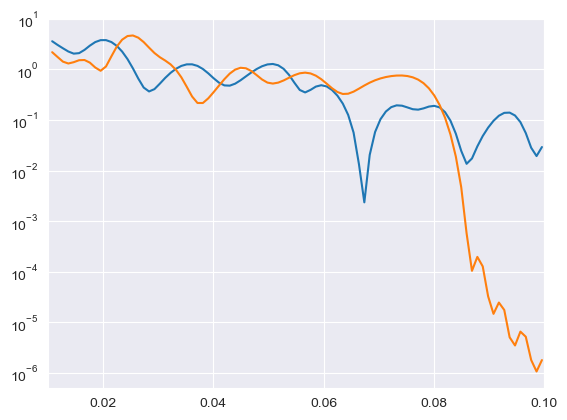

In [ ]:
from helper_functions import normalise_data, filter_frequencies, load_single_time_series
from matplotlib import pyplot as plt
import numpy as np
import torch

# Simulation parameters
T = 434          # Total simulation time in seconds
h = 0.01         # Integration time step (100 Hz simulation)
time = np.arange(0, T, h)
alpha_v, beta_v = 1, 0.8  # State noise parameters
alpha_e, beta_e = 10, 5 # Observation noise parameters
desired_TR = 2      # Downsample to match a TR of 2 seconds

# Instantiate your model
model = PDCMMODEL()

# Simulate the BOLD signal
downsampled_time, downsampled_bold = simulate_bold_euler_maruyama(
    model=model,
    time=time,
    h=h,
    alpha_v=alpha_v,
    beta_v=beta_v,
    alpha_e=alpha_e,
    beta_e=beta_e,
    desired_TR=desired_TR,
    add_state_noise=True,
    add_obs_noise=True,
)

downsampled_bold = normalise_data(downsampled_bold)

# Plot the downsampled BOLD signal
plt.figure(figsize=(10, 4))
plt.plot(downsampled_time.detach().numpy(), downsampled_bold.detach().numpy(), lw=1)
plt.xlabel('Time (s)')
plt.ylabel('BOLD Signal')
plt.title('Simulated BOLD Signal using Euler–Maruyama')
plt.tight_layout()
plt.show()

from scipy_to_torch import torch_csd

bold_tensor = downsampled_bold.detach()  # already a tensor, just ensure detached from graph
f, psd = torch_csd(bold_tensor, bold_tensor, fs=0.5, nperseg=128, nfft=512)

f, psd = filter_frequencies(f, psd, 0.01, 0.1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


region_index = 52
exp = "PLCB"
file = f"/Users/xuenbei/Desktop/finalyearproject/time_series/sub-002-{exp}-ROI{region_index}.txt"
observed_bold = torch.tensor(load_single_time_series(file), dtype=torch.float32, device=device)

observed_bold = normalise_data(observed_bold)


min_len = min(len(observed_bold), len(downsampled_bold))
sim_bold_plot = downsampled_bold[:min_len].detach().cpu().numpy()
real_bold_plot = observed_bold[:min_len].detach().cpu().numpy()
time_axis = downsampled_time[:min_len].detach().cpu().numpy()

plt.figure(figsize=(12, 4))
plt.plot(time_axis, real_bold_plot, label="Real fMRI BOLD", color='red', alpha=0.7)
plt.plot(time_axis, sim_bold_plot, label="Simulated BOLD", color='blue', alpha=0.7)
plt.xlabel("Time (s)")
plt.ylabel("Normalised BOLD Signal")
plt.title(f"Simulated vs. Real BOLD Signal (ROI {region_index})")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

real_freqs, real_psd = torch_csd(observed_bold, observed_bold, fs=0.5, nperseg=128, nfft=512)
real_freqs, real_psd = filter_frequencies(real_freqs, real_psd, min_freq=0.01, max_freq=0.1)

plt.plot(f, psd)
plt.plot(real_freqs, real_psd)
plt.xlim(0.01, 0.1)
plt.show()

plt.semilogy(f, psd)
plt.semilogy(real_freqs, real_psd)
plt.xlim(0.01, 0.1)
plt.show()

psd = psd/psd.std()
real_psd = real_psd/real_psd.std()

plt.plot(f, psd)
plt.plot(real_freqs, real_psd)
plt.xlim(0.01, 0.1)
plt.show()

plt.semilogy(f, psd)
plt.semilogy(real_freqs, real_psd)
plt.xlim(0.01, 0.1)
plt.show()

[I 2025-05-10 02:37:35,470] A new study created in memory with name: no-name-74ff5682-227a-4a68-96e4-4ad27b4aaa50



=== Running P-DCM for Subject 019, ROI 6, Condition: LSD ===


[I 2025-05-10 02:37:50,591] Trial 0 finished with value: 48.19622039794922 and parameters: {'phi': 1.4065219985283648, 'varphi': 0.5952067742650958, 'chi': 0.24526608836179112, 'tMTT': 4.729601689991719, 'tau': 17.61131546324888, 'sigma': 1.1325306514731568, 'mu': 0.5643167053550644, 'lamb': 0.07103783274973775, 'alpha_v': 18.12903619728438, 'beta_v': 4.684515757533615, 'alpha_e': 12.136639263047053, 'beta_e': 0.12802189613876885}. Best is trial 0 with value: 48.19622039794922.
[I 2025-05-10 02:38:07,613] Trial 1 finished with value: 43.144813537597656 and parameters: {'phi': 1.4759934809670523, 'varphi': 0.5359261230934537, 'chi': 0.20464059691369874, 'tMTT': 0.7154379612069146, 'tau': 10.300053424711809, 'sigma': 0.5156890417740485, 'mu': 0.6538154837776553, 'lamb': 0.2538790262274528, 'alpha_v': 18.097432515515855, 'beta_v': 1.8732487856851199, 'alpha_e': 6.498375921705105, 'beta_e': 0.1968018096437656}. Best is trial 1 with value: 43.144813537597656.
[I 2025-05-10 02:38:25,415] Tri

[Epoch 0] Loss: 21.584837


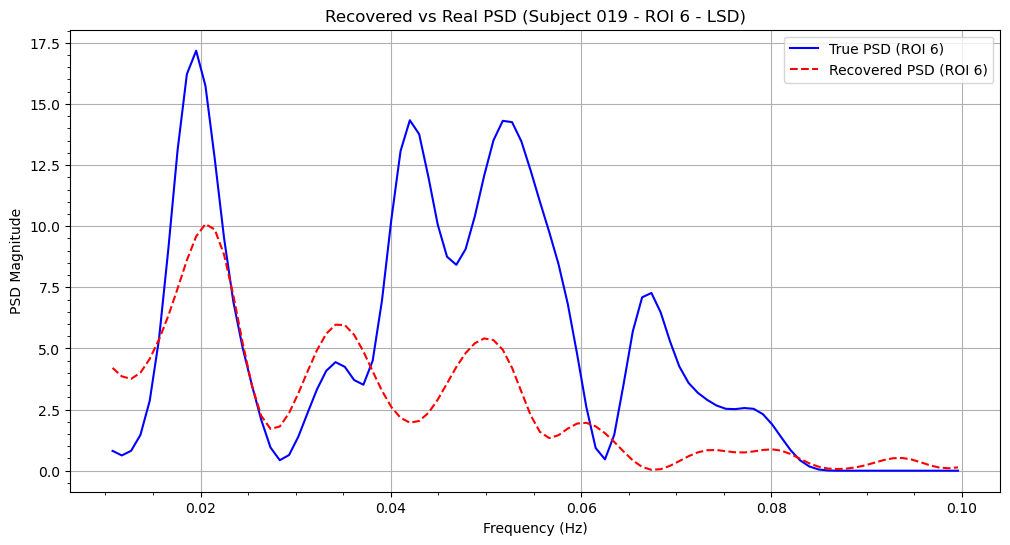

<Figure size 640x480 with 0 Axes>

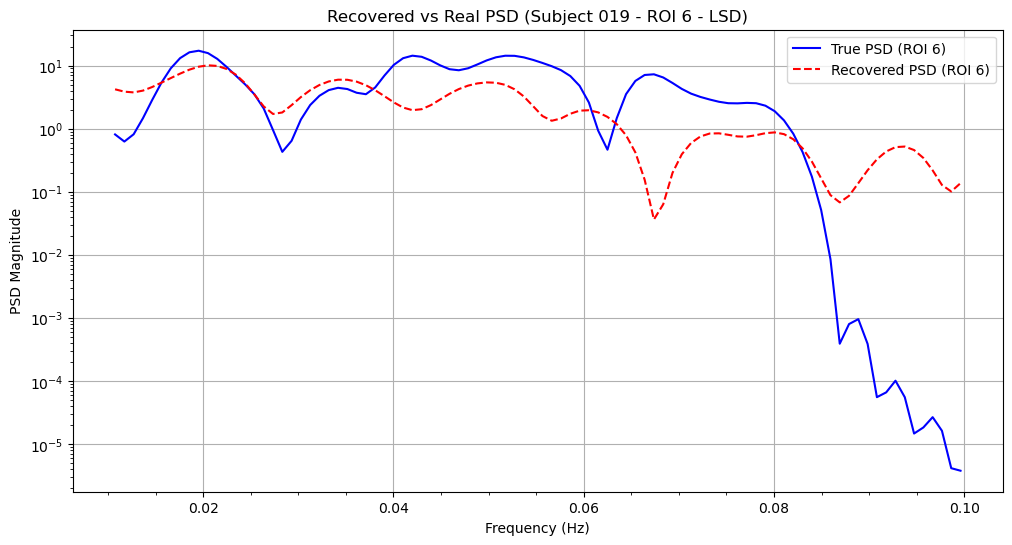

<Figure size 640x480 with 0 Axes>

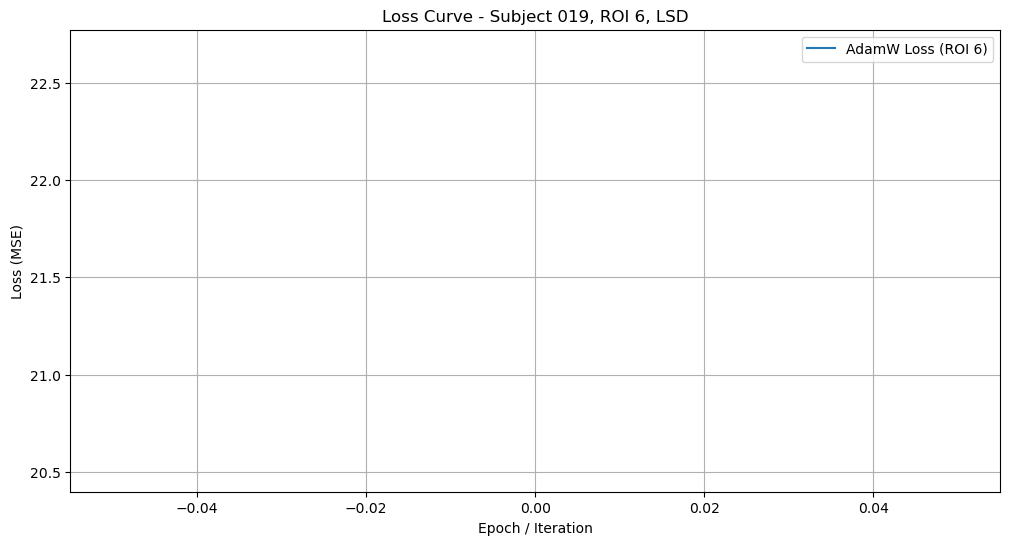

[I 2025-05-10 03:03:21,254] A new study created in memory with name: no-name-4fe78a0e-d281-4b35-ac17-6b6b1868493c


=== Torch Optimisation Evaluation Results ===
MSE = 2.1585e+01, NMSE = 4.3024e-01, Relative Error = 6.5593e-01
Explained Variance = 0.5408
Pearson Correlation = 0.5968, Cross-Correlation = 0.5968
Coherence = 0.6507, KL Divergence = 4.6348e-01
=== Torch Optimisation Evaluation Results ===
MSE = 7.9761e-01, NMSE = 3.8844e-01, Relative Error = 6.2325e-01
Explained Variance = 0.6655
Pearson Correlation = 0.5968, Cross-Correlation = 0.5968
Coherence = 0.6507, KL Divergence = 4.6348e-01

=== Running P-DCM for Subject 019, ROI 6, Condition: PLCB ===


[I 2025-05-10 03:04:03,693] Trial 0 finished with value: 55.995601654052734 and parameters: {'phi': 1.016131982514782, 'varphi': 0.4484896442801019, 'chi': 0.3379684239441432, 'tMTT': 2.968977504231511, 'tau': 18.582083657402624, 'sigma': 0.5001023993810472, 'mu': 1.2521552125212003, 'lamb': 0.2696828988019976, 'alpha_v': 8.231478820460014, 'beta_v': 3.5327548798725816, 'alpha_e': 18.953118634588414, 'beta_e': 1.624011961020028}. Best is trial 0 with value: 55.995601654052734.
[I 2025-05-10 03:04:32,132] Trial 1 finished with value: 49.854949951171875 and parameters: {'phi': 1.665952032200636, 'varphi': 0.26124186743029576, 'chi': 0.16211624455062093, 'tMTT': 2.1215086491332276, 'tau': 21.2849505851584, 'sigma': 1.5016042109696592, 'mu': 1.695797361022916, 'lamb': 0.2881030030462464, 'alpha_v': 11.981210943452838, 'beta_v': 2.4543597013947194, 'alpha_e': 13.629699479395203, 'beta_e': 4.606475669993703}. Best is trial 1 with value: 49.854949951171875.
[I 2025-05-10 03:04:56,989] Trial 2

[Epoch 0] Loss: 9.454111


<Figure size 640x480 with 0 Axes>

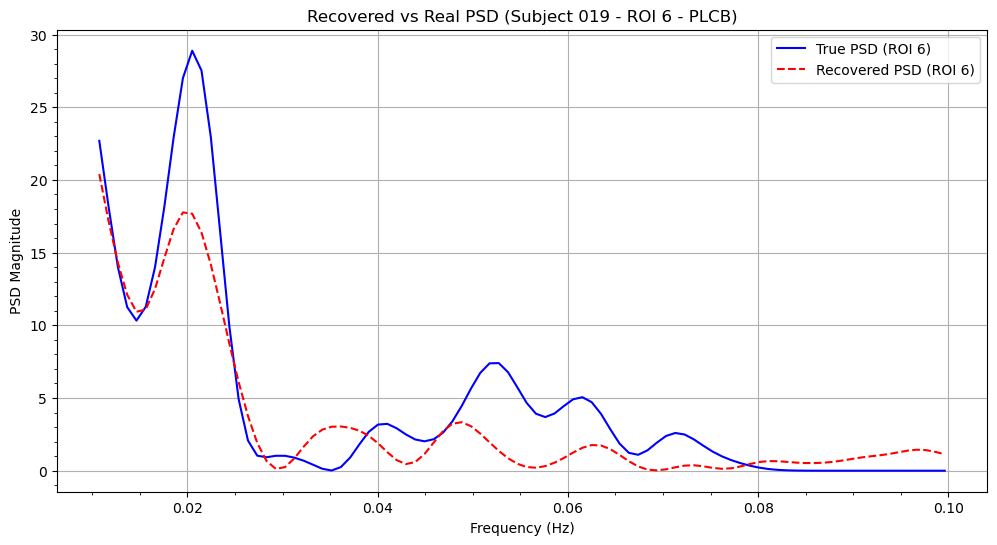

<Figure size 640x480 with 0 Axes>

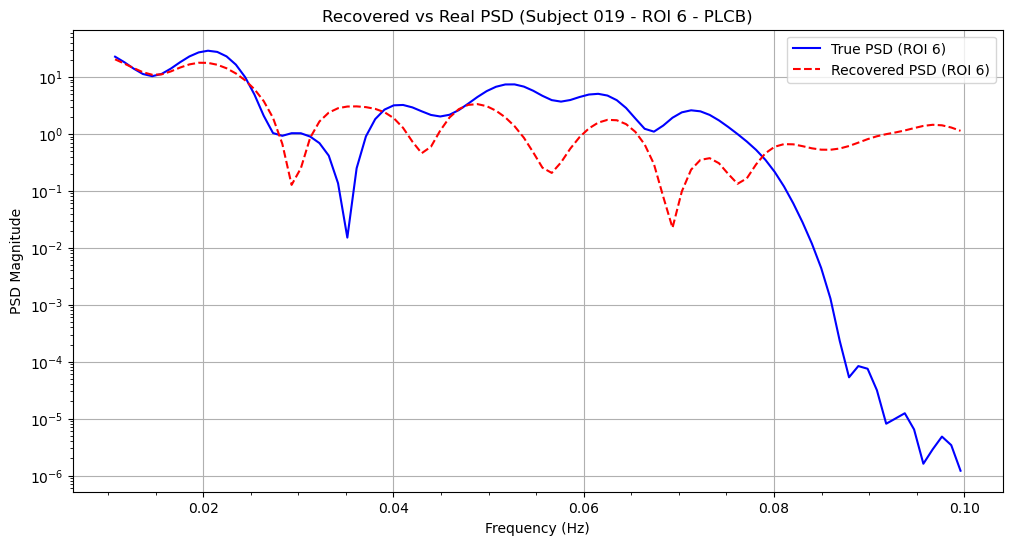

<Figure size 640x480 with 0 Axes>

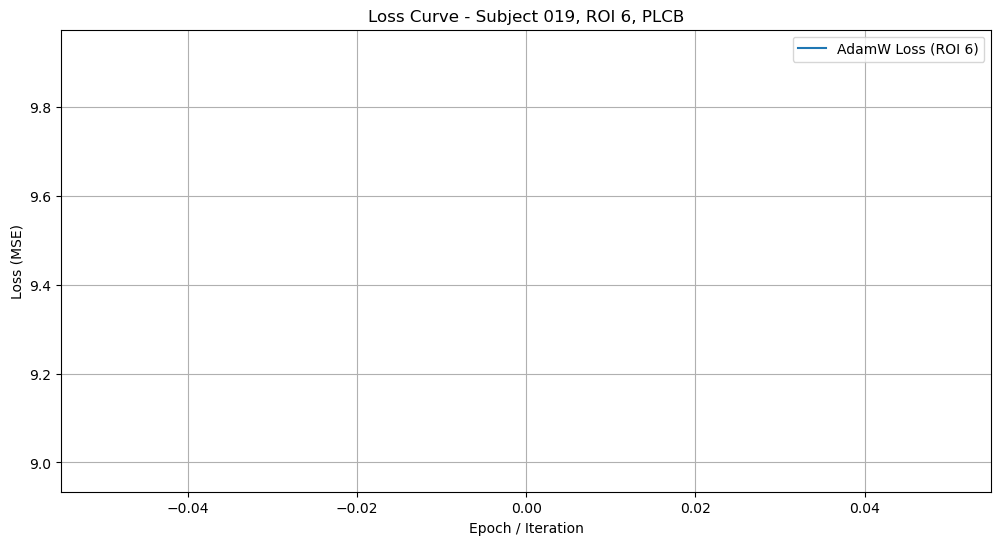

[I 2025-05-10 03:30:14,290] A new study created in memory with name: no-name-2322a972-106a-4d14-a328-7a4e7de711bb


=== Torch Optimisation Evaluation Results ===
MSE = 9.4541e+00, NMSE = 1.3826e-01, Relative Error = 3.7183e-01
Explained Variance = 0.8919
Pearson Correlation = 0.9297, Cross-Correlation = 0.9297
Coherence = 0.9053, KL Divergence = 3.0658e-01
=== Torch Optimisation Evaluation Results ===
MSE = 1.3930e-01, NMSE = 9.6263e-02, Relative Error = 3.1026e-01
Explained Variance = 0.9507
Pearson Correlation = 0.9297, Cross-Correlation = 0.9297
Coherence = 0.9053, KL Divergence = 3.0658e-01

=== Running P-DCM for Subject 019, ROI 7, Condition: LSD ===


[W 2025-05-10 03:30:56,279] Trial 0 failed with parameters: {'phi': 1.920684829699734, 'varphi': 0.607743491341425, 'chi': 0.19563187796036752, 'tMTT': 2.095883429917864, 'tau': 2.8659352623718632, 'sigma': 0.7100422849295216, 'mu': 0.49492794421497566, 'lamb': 0.1708654098328522, 'alpha_v': 8.361378422472757, 'beta_v': 2.496085464284145, 'alpha_e': 1.018836059112471, 'beta_e': 2.651865231312968} because of the following error: The value nan is not acceptable.
[W 2025-05-10 03:30:56,283] Trial 0 failed with value nan.
[I 2025-05-10 03:31:30,986] Trial 1 finished with value: 33.62428283691406 and parameters: {'phi': 1.1099076672881418, 'varphi': 0.11836587778760742, 'chi': 0.49302303571892037, 'tMTT': 2.152373095612515, 'tau': 10.660303011344237, 'sigma': 0.5522691630365131, 'mu': 1.636371591039253, 'lamb': 0.10019817929893653, 'alpha_v': 9.139216085825977, 'beta_v': 4.306476479145924, 'alpha_e': 18.630280861985636, 'beta_e': 3.554123350119879}. Best is trial 1 with value: 33.6242828369

[Epoch 0] Loss: 22.880100


<Figure size 640x480 with 0 Axes>

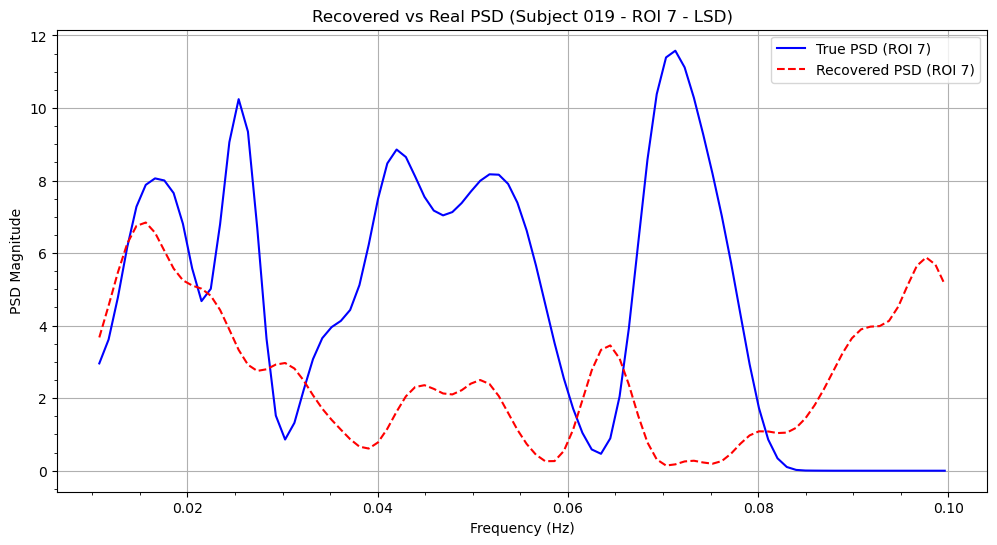

<Figure size 640x480 with 0 Axes>

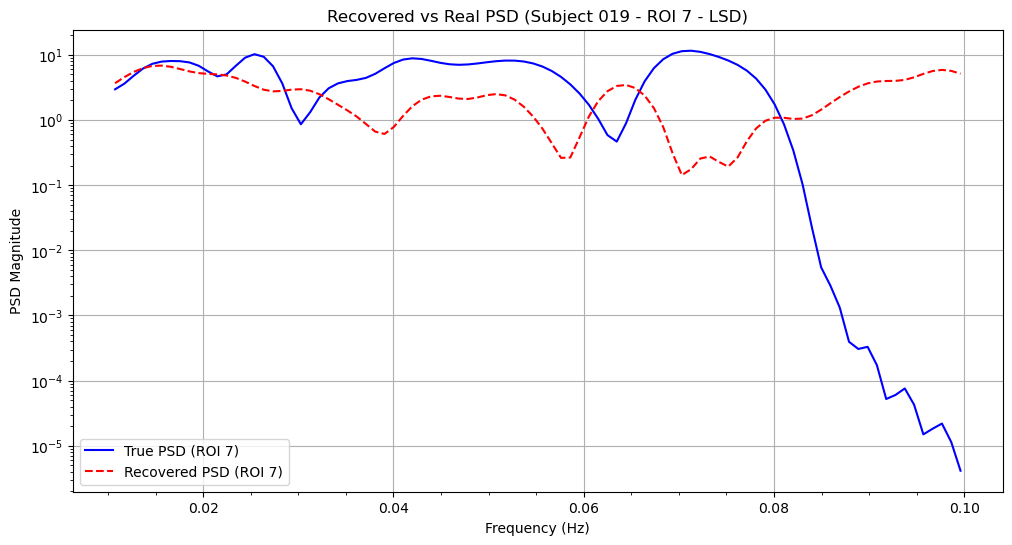

<Figure size 640x480 with 0 Axes>

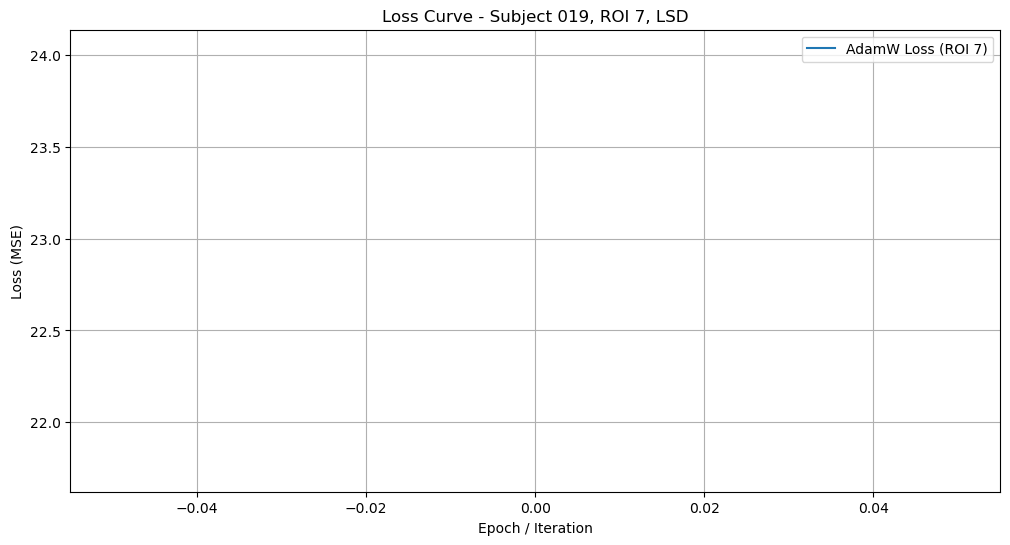

[I 2025-05-10 03:56:56,219] A new study created in memory with name: no-name-e04a5d94-b7d1-458a-9f14-335e6d53460a


=== Torch Optimisation Evaluation Results ===
MSE = 2.2880e+01, NMSE = 6.6983e-01, Relative Error = 8.1843e-01
Explained Variance = 0.3809
Pearson Correlation = -0.2175, Cross-Correlation = -0.2175
Coherence = 0.3312, KL Divergence = 9.9269e-01
=== Torch Optimisation Evaluation Results ===
MSE = 2.4146e+00, NMSE = 8.8249e-01, Relative Error = 9.3941e-01
Explained Variance = 0.3776
Pearson Correlation = -0.2175, Cross-Correlation = -0.2175
Coherence = 0.3312, KL Divergence = 9.9269e-01

=== Running P-DCM for Subject 019, ROI 7, Condition: PLCB ===


[I 2025-05-10 03:57:30,974] Trial 0 finished with value: 34.068355560302734 and parameters: {'phi': 1.6650153805013792, 'varphi': 0.9472450129776434, 'chi': 0.543017011876348, 'tMTT': 0.9705475142899679, 'tau': 17.192803010807403, 'sigma': 0.5568001230695, 'mu': 1.7353254374099625, 'lamb': 0.1045612245682206, 'alpha_v': 0.6546437409076998, 'beta_v': 1.0301109961430763, 'alpha_e': 9.760673626720475, 'beta_e': 2.486102404085782}. Best is trial 0 with value: 34.068355560302734.
[I 2025-05-10 03:57:57,099] Trial 1 finished with value: 63.98183822631836 and parameters: {'phi': 1.016899038578656, 'varphi': 0.9615666557970827, 'chi': 0.2696975410819144, 'tMTT': 0.5326174928795292, 'tau': 14.109901517862355, 'sigma': 1.9392064069100872, 'mu': 1.9758626152814753, 'lamb': 0.3003280160466516, 'alpha_v': 9.636289328396325, 'beta_v': 0.3438785538833199, 'alpha_e': 12.285385816026944, 'beta_e': 3.4098955852270905}. Best is trial 0 with value: 34.068355560302734.
[I 2025-05-10 03:58:34,987] Trial 2 f

[Epoch 0] Loss: 24.636568


<Figure size 640x480 with 0 Axes>

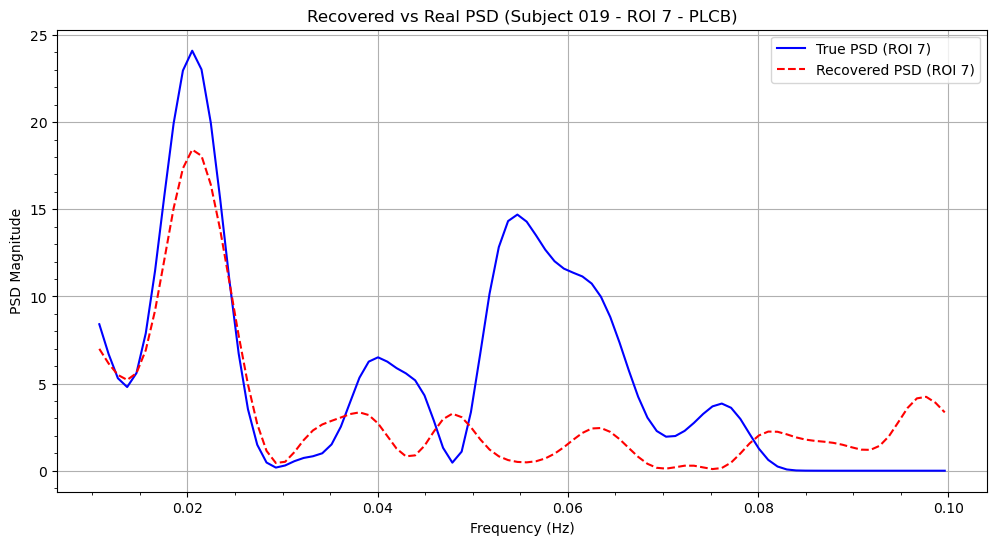

<Figure size 640x480 with 0 Axes>

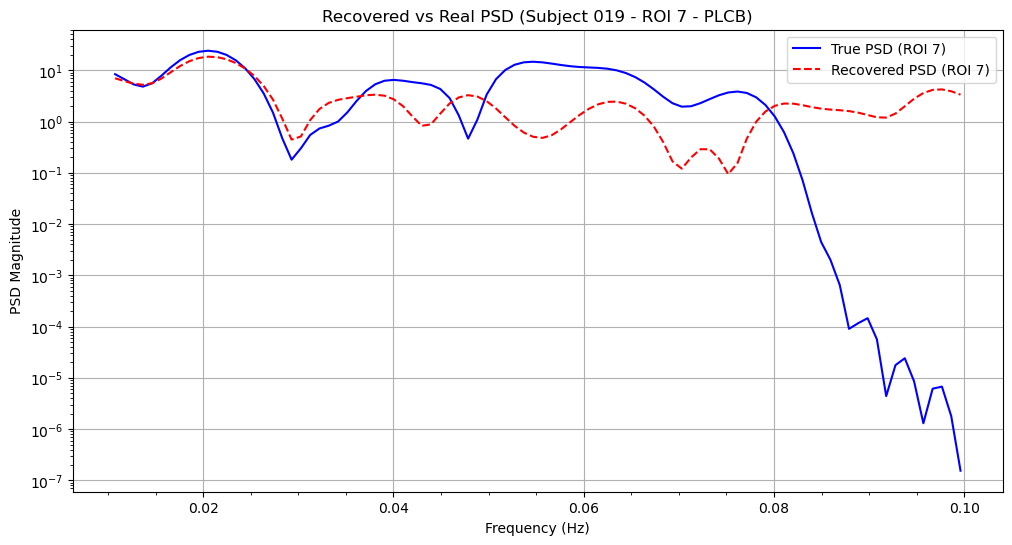

<Figure size 640x480 with 0 Axes>

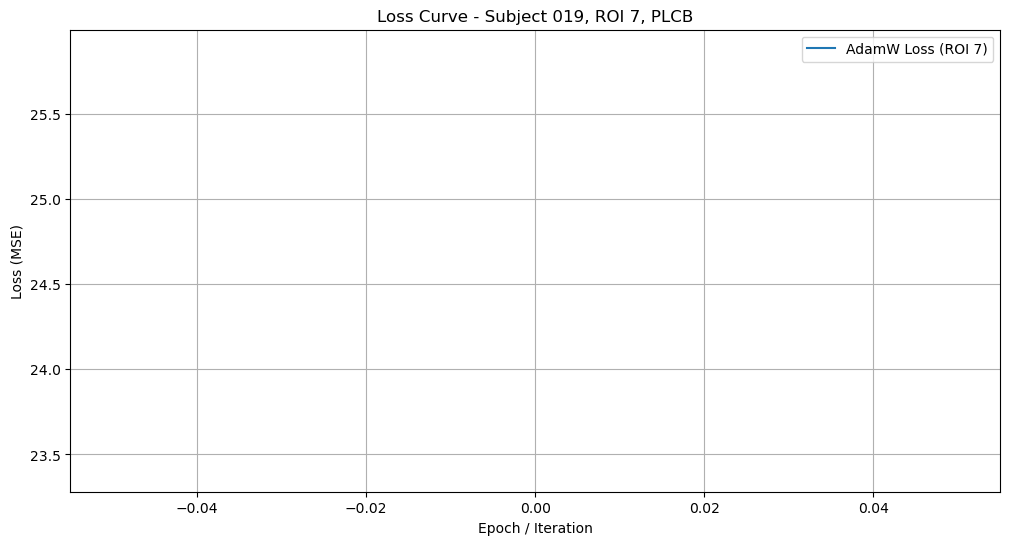

[I 2025-05-10 04:24:08,464] A new study created in memory with name: no-name-24b70e70-2c90-4b6a-876c-2ef2b883b789


=== Torch Optimisation Evaluation Results ===
MSE = 2.4637e+01, NMSE = 3.7024e-01, Relative Error = 6.0847e-01
Explained Variance = 0.6692
Pearson Correlation = 0.6685, Cross-Correlation = 0.6685
Coherence = 0.6537, KL Divergence = 7.0337e-01
=== Torch Optimisation Evaluation Results ===
MSE = 6.6844e-01, NMSE = 3.6503e-01, Relative Error = 6.0417e-01
Explained Variance = 0.7305
Pearson Correlation = 0.6685, Cross-Correlation = 0.6685
Coherence = 0.6537, KL Divergence = 7.0337e-01

=== Running P-DCM for Subject 019, ROI 8, Condition: LSD ===


[W 2025-05-10 04:24:42,394] Trial 0 failed with parameters: {'phi': 1.1879028729237397, 'varphi': 0.18936774517248875, 'chi': 0.46658788087862235, 'tMTT': 4.353093458405117, 'tau': 8.454233517729854, 'sigma': 0.8000728178761991, 'mu': 0.24217389006328682, 'lamb': 0.00884494679861822, 'alpha_v': 5.341094494250076, 'beta_v': 1.4568094797700473, 'alpha_e': 13.93381785276255, 'beta_e': 2.3095092865701954} because of the following error: The value nan is not acceptable.
[W 2025-05-10 04:24:42,398] Trial 0 failed with value nan.
[I 2025-05-10 04:25:14,801] Trial 1 finished with value: 60.740333557128906 and parameters: {'phi': 1.1965163331420707, 'varphi': 0.5473049420197199, 'chi': 0.11006529162945827, 'tMTT': 3.9848929235099115, 'tau': 14.650355761777405, 'sigma': 0.5717586323014208, 'mu': 1.5928777354894827, 'lamb': 0.34427689623516017, 'alpha_v': 12.647755938023433, 'beta_v': 0.8252315484962002, 'alpha_e': 17.864244577852077, 'beta_e': 1.973779342982503}. Best is trial 1 with value: 60.7

[Epoch 0] Loss: 31.372728


<Figure size 640x480 with 0 Axes>

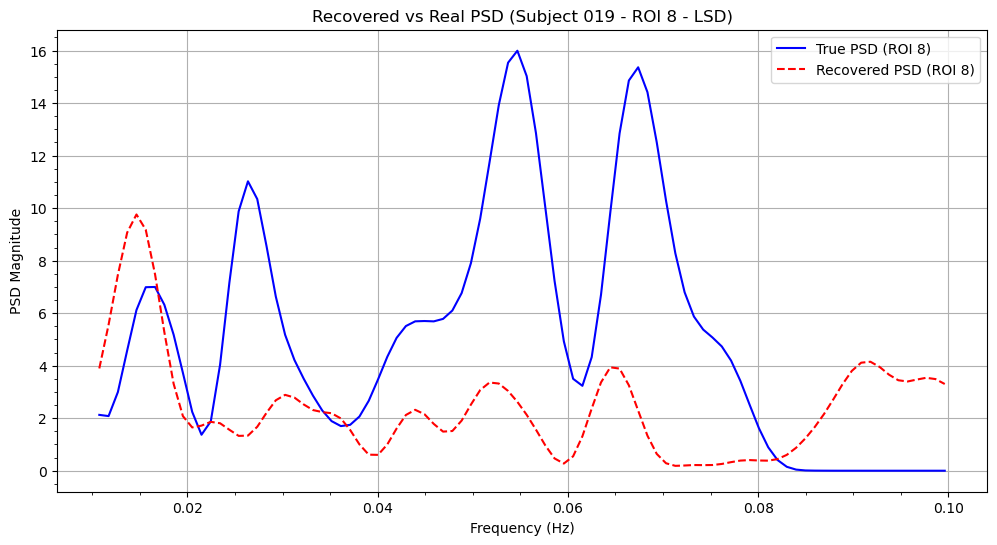

<Figure size 640x480 with 0 Axes>

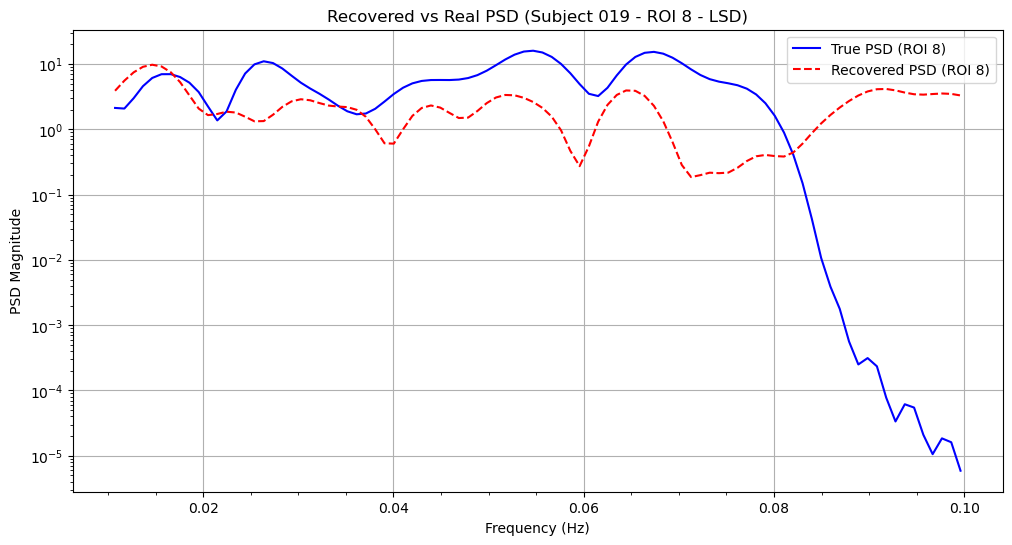

<Figure size 640x480 with 0 Axes>

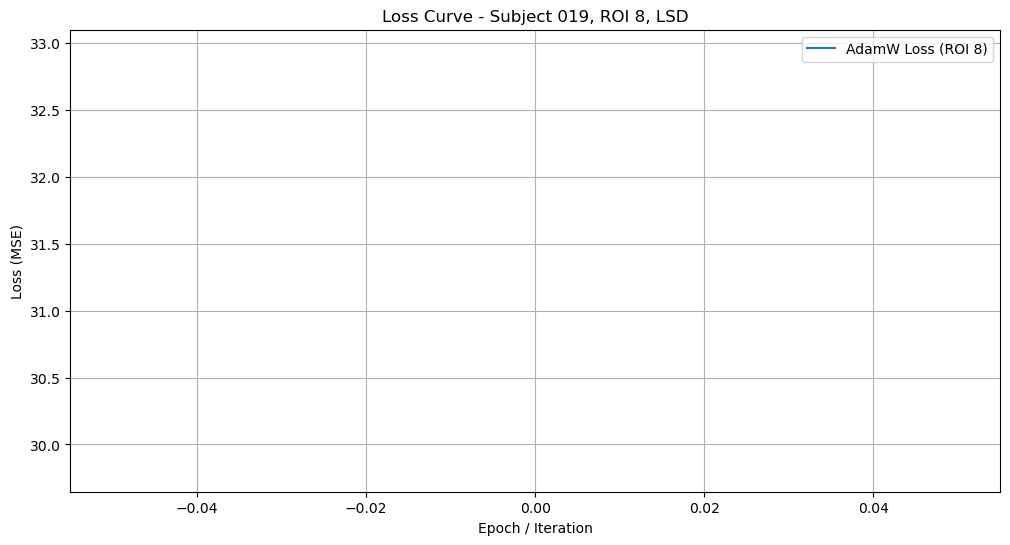

[I 2025-05-10 04:53:10,105] A new study created in memory with name: no-name-88cb7524-2246-4a94-ae4c-81ac59b22366


=== Torch Optimisation Evaluation Results ===
MSE = 3.1373e+01, NMSE = 6.7746e-01, Relative Error = 8.2308e-01
Explained Variance = 0.3781
Pearson Correlation = -0.0134, Cross-Correlation = -0.0134
Coherence = 0.3389, KL Divergence = 7.8051e-01
=== Torch Optimisation Evaluation Results ===
MSE = 2.0091e+00, NMSE = 8.6436e-01, Relative Error = 9.2971e-01
Explained Variance = 0.2455
Pearson Correlation = -0.0134, Cross-Correlation = -0.0134
Coherence = 0.3389, KL Divergence = 7.8051e-01

=== Running P-DCM for Subject 019, ROI 8, Condition: PLCB ===


[I 2025-05-10 04:53:37,748] Trial 0 finished with value: 26.910442352294922 and parameters: {'phi': 1.3755747705342123, 'varphi': 0.4111984853762083, 'chi': 0.7443073877137549, 'tMTT': 1.8086067478664227, 'tau': 13.324619141000543, 'sigma': 0.918005740269761, 'mu': 1.8514972775139968, 'lamb': 0.34581904283025905, 'alpha_v': 5.502122379954639, 'beta_v': 0.9331072068779567, 'alpha_e': 11.402842683747544, 'beta_e': 0.3934357728451622}. Best is trial 0 with value: 26.910442352294922.
[I 2025-05-10 04:54:06,053] Trial 1 finished with value: 71.35993194580078 and parameters: {'phi': 1.8780761099948755, 'varphi': 0.27640914607573674, 'chi': 0.6105609494416591, 'tMTT': 5.222833684036851, 'tau': 26.006718863678085, 'sigma': 1.176545656606816, 'mu': 0.31026933340155716, 'lamb': 0.010789377058481209, 'alpha_v': 12.554178634219511, 'beta_v': 4.851244699114052, 'alpha_e': 9.828671157586536, 'beta_e': 1.765100888722714}. Best is trial 0 with value: 26.910442352294922.
[I 2025-05-10 04:54:30,725] Tri

[Epoch 0] Loss: 14.265696


<Figure size 640x480 with 0 Axes>

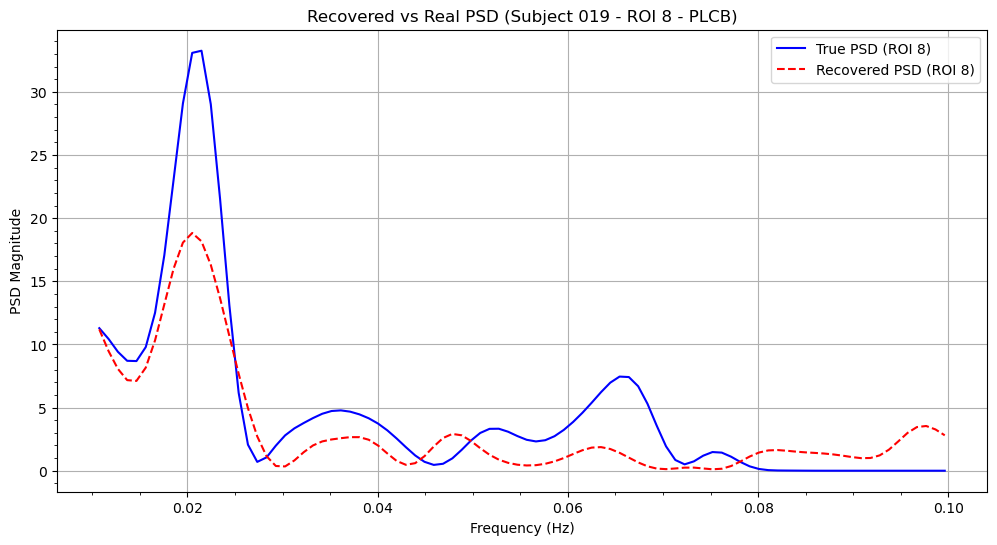

<Figure size 640x480 with 0 Axes>

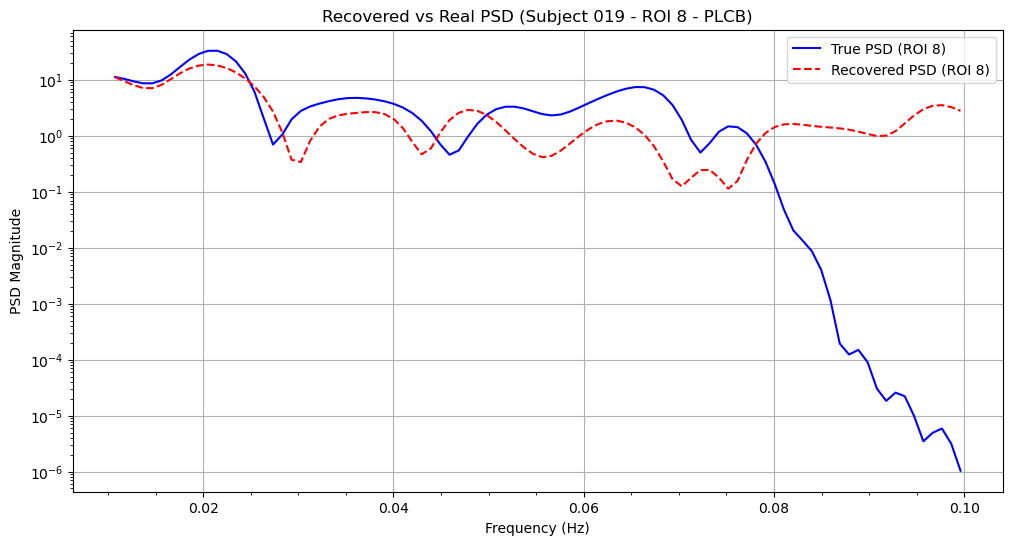

<Figure size 640x480 with 0 Axes>

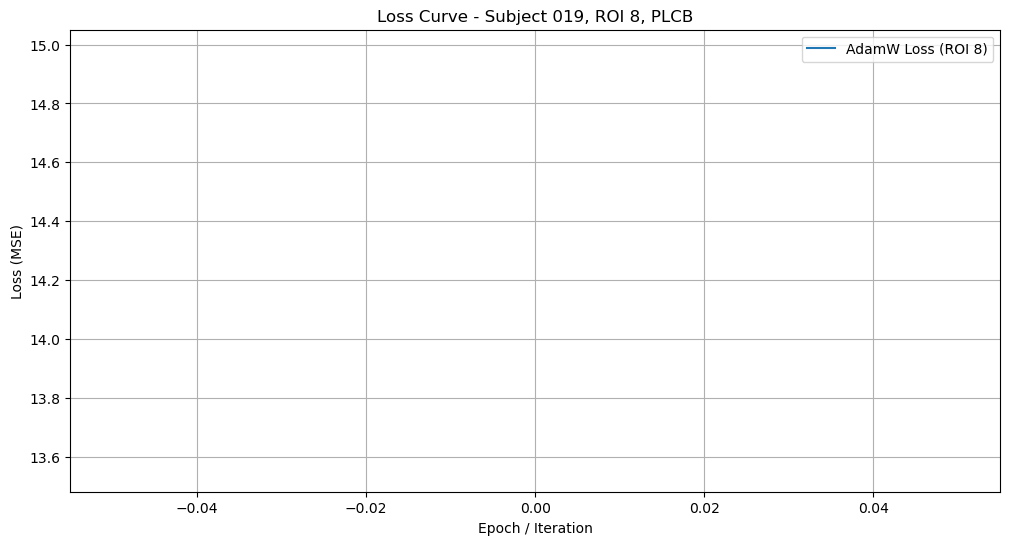

[I 2025-05-10 05:17:46,115] A new study created in memory with name: no-name-d0082c59-d38d-4b0c-8ee6-674a8c06f34f


=== Torch Optimisation Evaluation Results ===
MSE = 1.4266e+01, NMSE = 1.9332e-01, Relative Error = 4.3969e-01
Explained Variance = 0.8546
Pearson Correlation = 0.9212, Cross-Correlation = 0.9212
Coherence = 0.8954, KL Divergence = 3.1618e-01
=== Torch Optimisation Evaluation Results ===
MSE = 1.6062e-01, NMSE = 1.1221e-01, Relative Error = 3.3498e-01
Explained Variance = 0.9494
Pearson Correlation = 0.9212, Cross-Correlation = 0.9212
Coherence = 0.8954, KL Divergence = 3.1618e-01

=== Running P-DCM for Subject 019, ROI 9, Condition: LSD ===


[W 2025-05-10 05:18:12,862] Trial 0 failed with parameters: {'phi': 1.7529346260369236, 'varphi': 0.1901658665267867, 'chi': 0.4265404689820964, 'tMTT': 0.5951588315136837, 'tau': 28.80008664826085, 'sigma': 1.443011076227287, 'mu': 0.7442434661756998, 'lamb': 0.0040946267853794955, 'alpha_v': 6.345887409607775, 'beta_v': 1.6141583672616198, 'alpha_e': 16.55501304370769, 'beta_e': 0.7814027005692604} because of the following error: The value nan is not acceptable.
[W 2025-05-10 05:18:12,870] Trial 0 failed with value nan.
[I 2025-05-10 05:18:50,888] Trial 1 finished with value: 74.8968276977539 and parameters: {'phi': 1.5542456072304218, 'varphi': 0.17422989870181874, 'chi': 0.9462708247244453, 'tMTT': 5.008501334846782, 'tau': 29.5504861449507, 'sigma': 1.985848127677526, 'mu': 0.3311908528418688, 'lamb': 0.3104130323653358, 'alpha_v': 18.248691752539425, 'beta_v': 4.434448474988449, 'alpha_e': 14.411328693186253, 'beta_e': 1.1131587533259868}. Best is trial 1 with value: 74.896827697

[Epoch 0] Loss: 22.261852


<Figure size 640x480 with 0 Axes>

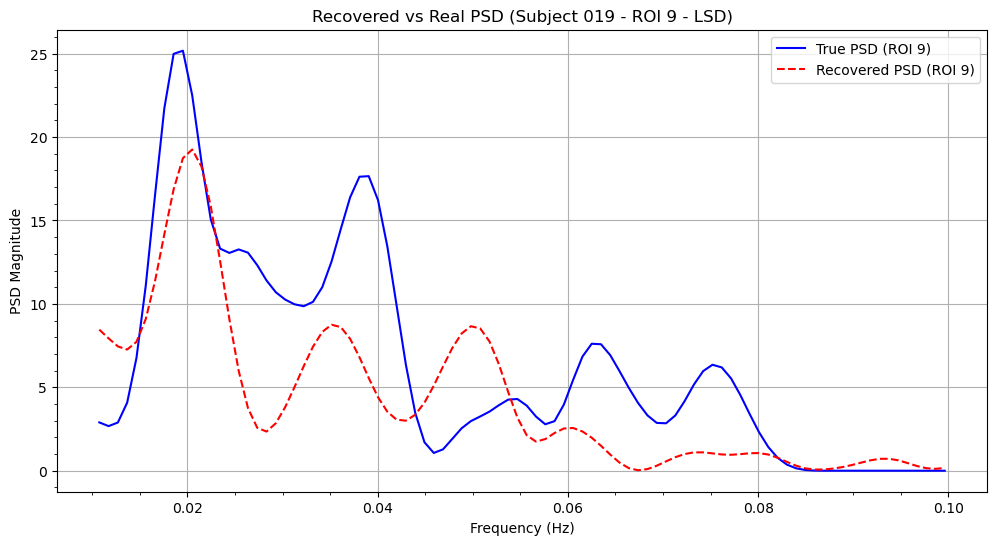

<Figure size 640x480 with 0 Axes>

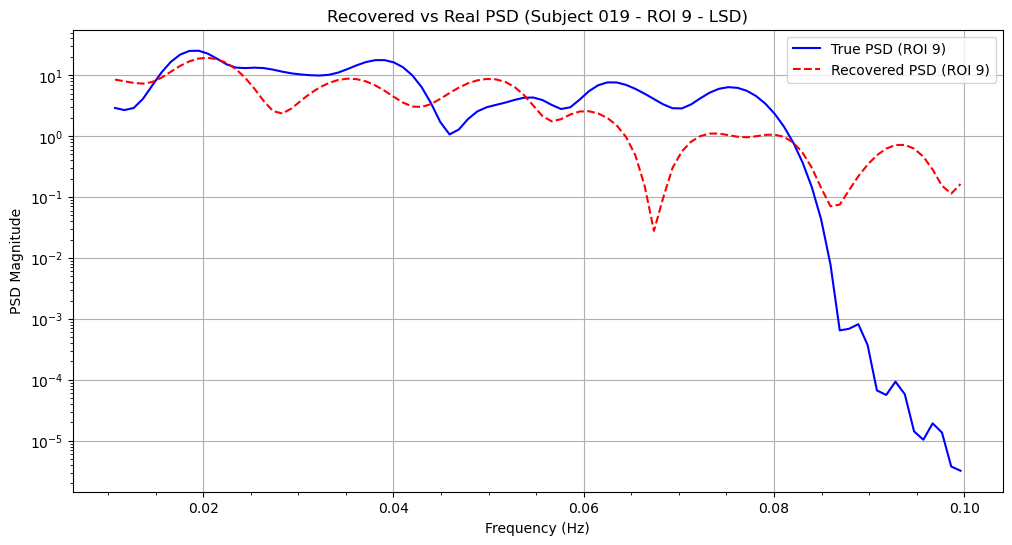

<Figure size 640x480 with 0 Axes>

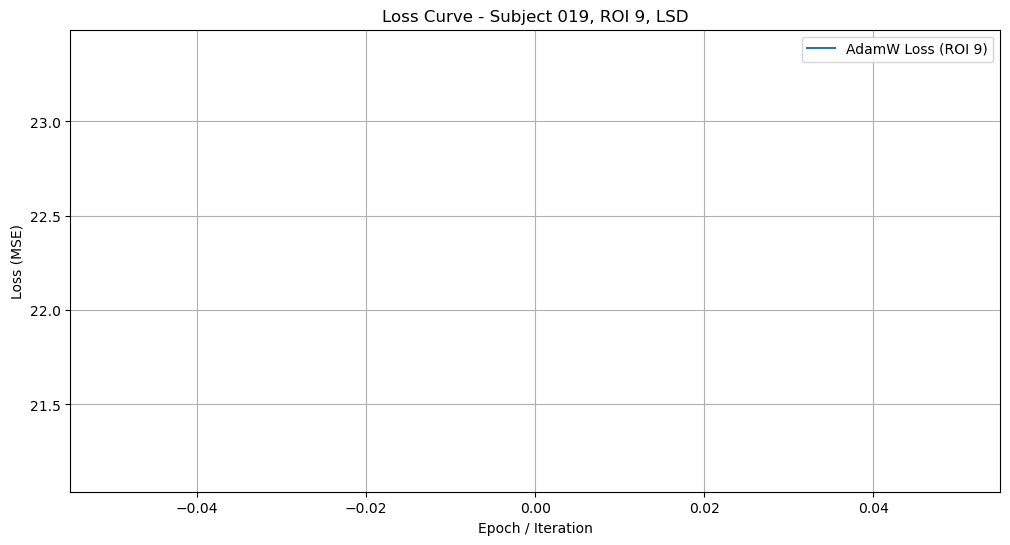

[I 2025-05-10 05:44:14,629] A new study created in memory with name: no-name-d468de6b-eb57-48a0-8bf1-fb8290576300


=== Torch Optimisation Evaluation Results ===
MSE = 2.2262e+01, NMSE = 2.7306e-01, Relative Error = 5.2255e-01
Explained Variance = 0.7674
Pearson Correlation = 0.7449, Cross-Correlation = 0.7449
Coherence = 0.7541, KL Divergence = 3.2674e-01
=== Torch Optimisation Evaluation Results ===
MSE = 5.1620e-01, NMSE = 2.5219e-01, Relative Error = 5.0219e-01
Explained Variance = 0.7771
Pearson Correlation = 0.7449, Cross-Correlation = 0.7449
Coherence = 0.7541, KL Divergence = 3.2674e-01

=== Running P-DCM for Subject 019, ROI 9, Condition: PLCB ===


[I 2025-05-10 05:44:47,142] Trial 0 finished with value: 18.968685150146484 and parameters: {'phi': 1.7039434902346615, 'varphi': 0.9227410895147846, 'chi': 0.5842129368061653, 'tMTT': 1.8746509935523594, 'tau': 5.00838107699585, 'sigma': 0.7485279963749585, 'mu': 1.7420864792481068, 'lamb': 0.004319373770827311, 'alpha_v': 5.183226731011992, 'beta_v': 1.8390628834462603, 'alpha_e': 11.324092945890934, 'beta_e': 0.8797440040601334}. Best is trial 0 with value: 18.968685150146484.
[I 2025-05-10 05:45:16,356] Trial 1 finished with value: 21.019329071044922 and parameters: {'phi': 1.2262953309197195, 'varphi': 0.6434367733566435, 'chi': 0.5073720916825513, 'tMTT': 3.9930669982290734, 'tau': 31.25330873697818, 'sigma': 1.7179377759190793, 'mu': 1.4187511263366306, 'lamb': 0.23172943792499495, 'alpha_v': 3.2518520454694935, 'beta_v': 2.561993688150608, 'alpha_e': 19.05742461234546, 'beta_e': 1.1191187749768723}. Best is trial 0 with value: 18.968685150146484.
[I 2025-05-10 05:45:44,835] Tri

[Epoch 0] Loss: 11.467191


<Figure size 640x480 with 0 Axes>

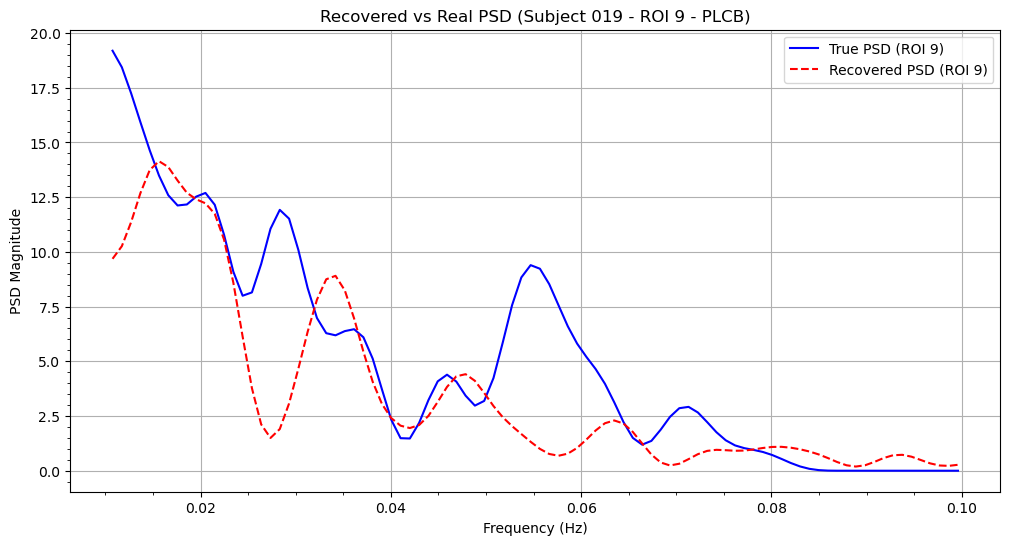

<Figure size 640x480 with 0 Axes>

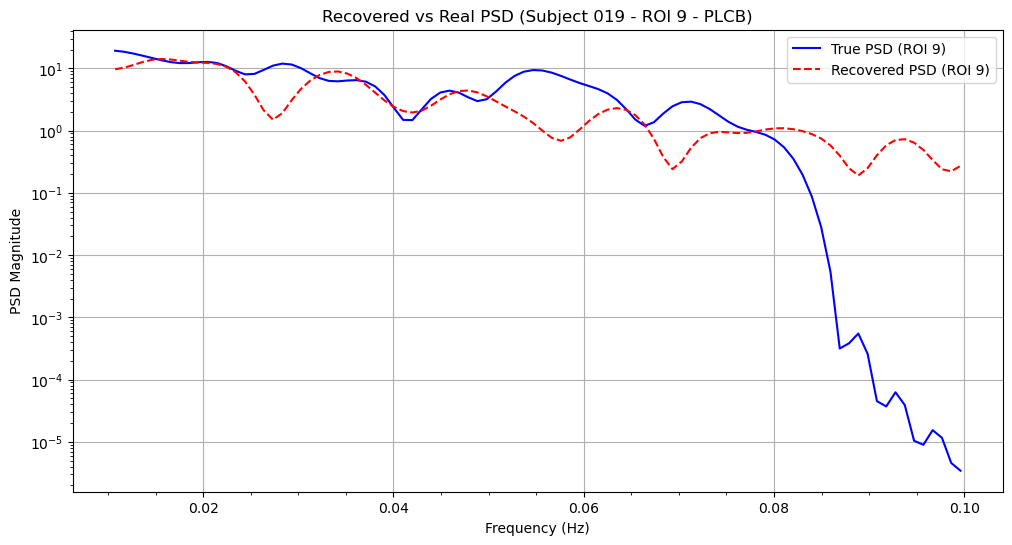

<Figure size 640x480 with 0 Axes>

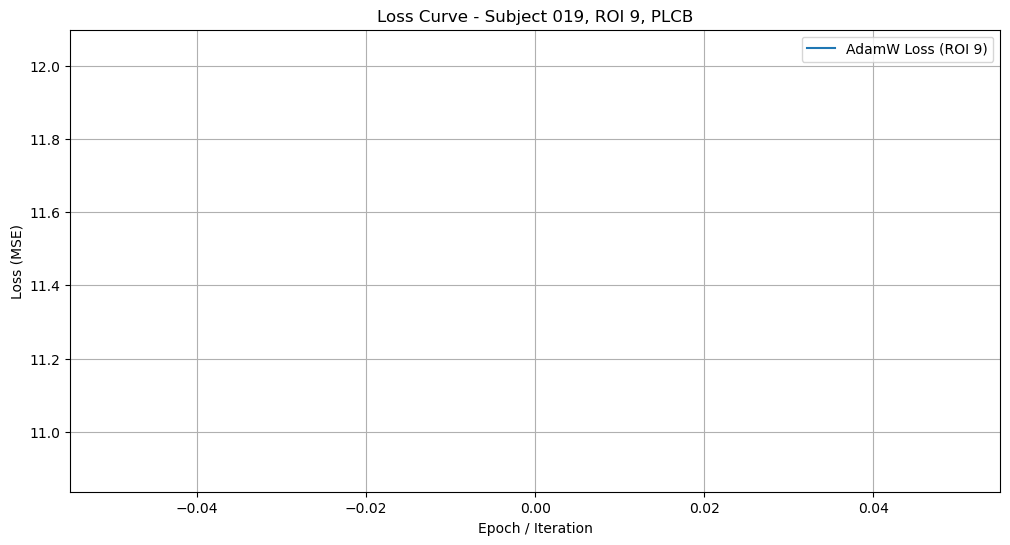

[I 2025-05-10 06:12:38,999] A new study created in memory with name: no-name-ff0662f9-d73b-4061-a358-8cc58ee3e241


=== Torch Optimisation Evaluation Results ===
MSE = 1.1467e+01, NMSE = 2.2653e-01, Relative Error = 4.7595e-01
Explained Variance = 0.7066
Pearson Correlation = 0.7890, Cross-Correlation = 0.7890
Coherence = 0.7880, KL Divergence = 2.7366e-01
=== Torch Optimisation Evaluation Results ===
MSE = 4.4098e-01, NMSE = 2.1348e-01, Relative Error = 4.6204e-01
Explained Variance = 0.7590
Pearson Correlation = 0.7890, Cross-Correlation = 0.7890
Coherence = 0.7880, KL Divergence = 2.7366e-01

=== Running P-DCM for Subject 019, ROI 10, Condition: LSD ===


[I 2025-05-10 06:13:09,427] Trial 0 finished with value: 45.005130767822266 and parameters: {'phi': 1.183327044764764, 'varphi': 0.38994501992086616, 'chi': 0.5134936950894222, 'tMTT': 4.790997456655903, 'tau': 24.341392160628416, 'sigma': 0.7834179235667356, 'mu': 0.5402744619734039, 'lamb': 0.24203756426641423, 'alpha_v': 16.147145146802842, 'beta_v': 3.7457262420380015, 'alpha_e': 5.268746990283533, 'beta_e': 1.9364349236894762}. Best is trial 0 with value: 45.005130767822266.
[I 2025-05-10 06:13:34,944] Trial 1 finished with value: 48.67079162597656 and parameters: {'phi': 1.1709121698179061, 'varphi': 0.4844643186607385, 'chi': 0.5735022399220271, 'tMTT': 3.8139032259174597, 'tau': 23.174106804595713, 'sigma': 1.7093444671640836, 'mu': 0.6949246943110701, 'lamb': 0.12758853137428422, 'alpha_v': 1.0397983696215463, 'beta_v': 0.46411281167458013, 'alpha_e': 13.920745894707169, 'beta_e': 4.321890905555276}. Best is trial 0 with value: 45.005130767822266.
[I 2025-05-10 06:14:04,149] T

[Epoch 0] Loss: 24.560793


<Figure size 640x480 with 0 Axes>

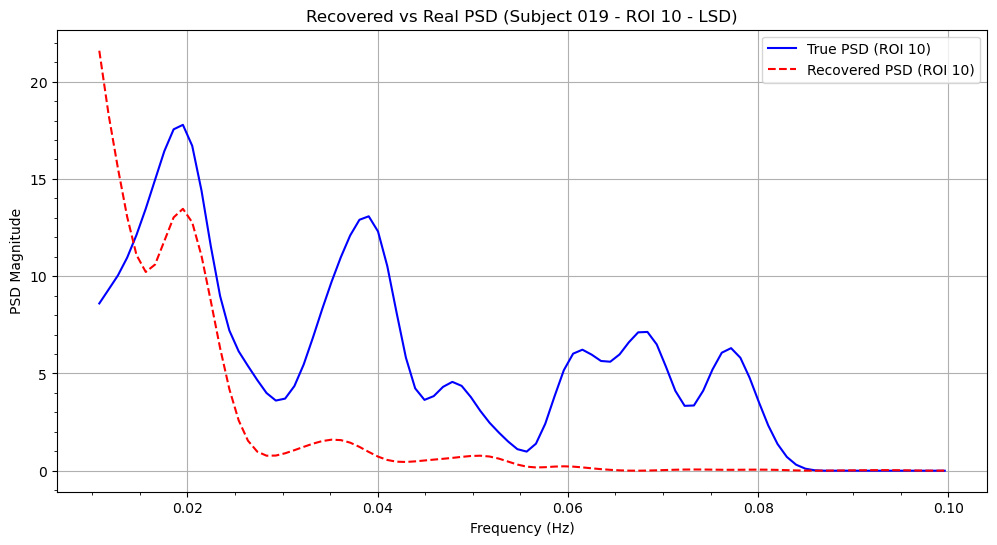

<Figure size 640x480 with 0 Axes>

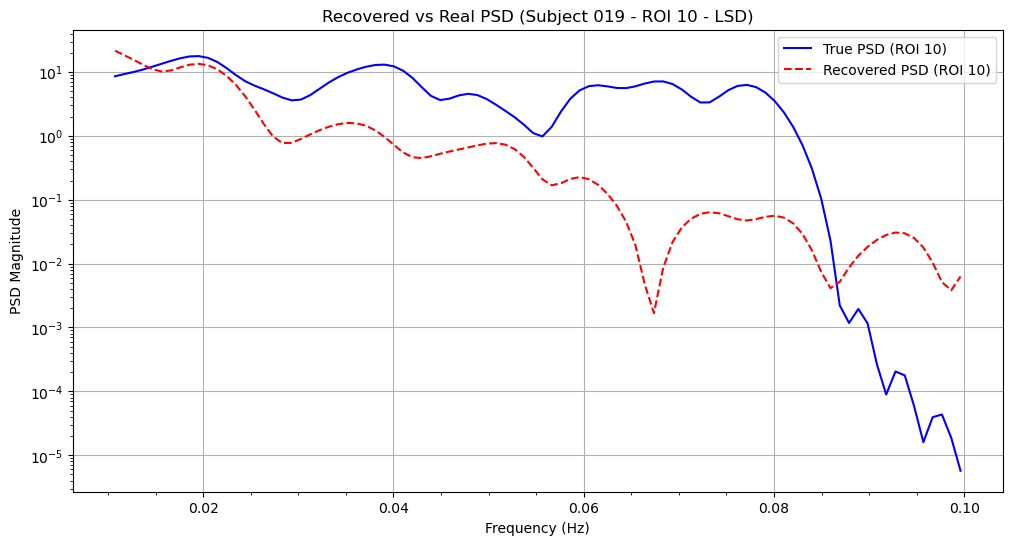

<Figure size 640x480 with 0 Axes>

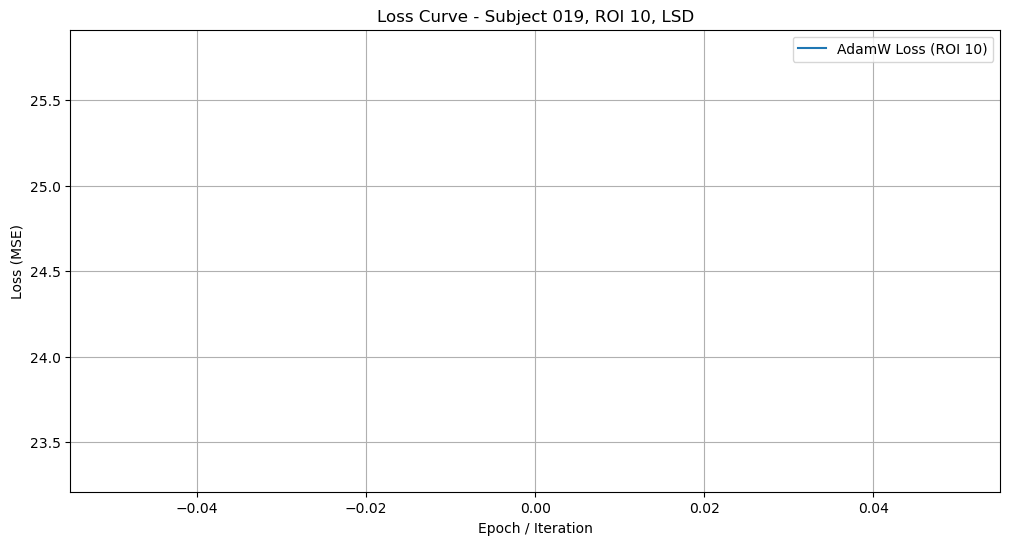

[I 2025-05-10 06:39:12,153] A new study created in memory with name: no-name-606b7e8e-9594-4114-8d26-a8952837ae90


=== Torch Optimisation Evaluation Results ===
MSE = 2.4561e+01, NMSE = 4.7187e-01, Relative Error = 6.8693e-01
Explained Variance = 0.5516
Pearson Correlation = 0.6713, Cross-Correlation = 0.6713
Coherence = 0.5282, KL Divergence = 1.1539e+00
=== Torch Optimisation Evaluation Results ===
MSE = 1.1410e+00, NMSE = 4.7200e-01, Relative Error = 6.8702e-01
Explained Variance = 0.5545
Pearson Correlation = 0.6713, Cross-Correlation = 0.6713
Coherence = 0.5282, KL Divergence = 1.1539e+00

=== Running P-DCM for Subject 019, ROI 10, Condition: PLCB ===


[W 2025-05-10 06:39:44,774] Trial 0 failed with parameters: {'phi': 1.3608028220885675, 'varphi': 0.14319992353072802, 'chi': 0.16918397982270098, 'tMTT': 2.169681882563782, 'tau': 0.32861474578657734, 'sigma': 0.6689805956360407, 'mu': 1.0746847331287235, 'lamb': 0.29591146948883107, 'alpha_v': 14.04549371155235, 'beta_v': 2.5464216007781726, 'alpha_e': 19.70341276395299, 'beta_e': 2.6802309926171834} because of the following error: The value nan is not acceptable.
[W 2025-05-10 06:39:44,778] Trial 0 failed with value nan.
[I 2025-05-10 06:40:10,917] Trial 1 finished with value: 16.191503524780273 and parameters: {'phi': 1.1946564149217238, 'varphi': 0.2669565665260559, 'chi': 0.8928753306436245, 'tMTT': 0.9378669745675645, 'tau': 28.586078371378694, 'sigma': 1.9939752957500754, 'mu': 1.5427313225093895, 'lamb': 0.25996882053448395, 'alpha_v': 7.265892278108625, 'beta_v': 2.3617422542256548, 'alpha_e': 15.573109714414125, 'beta_e': 1.9385223901322017}. Best is trial 1 with value: 16.1

[Epoch 0] Loss: 8.843110


<Figure size 640x480 with 0 Axes>

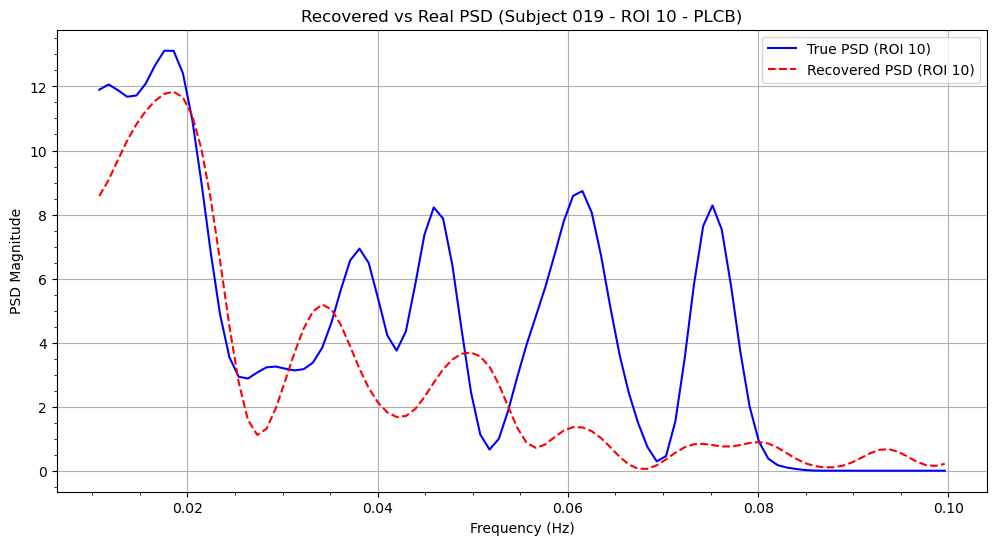

<Figure size 640x480 with 0 Axes>

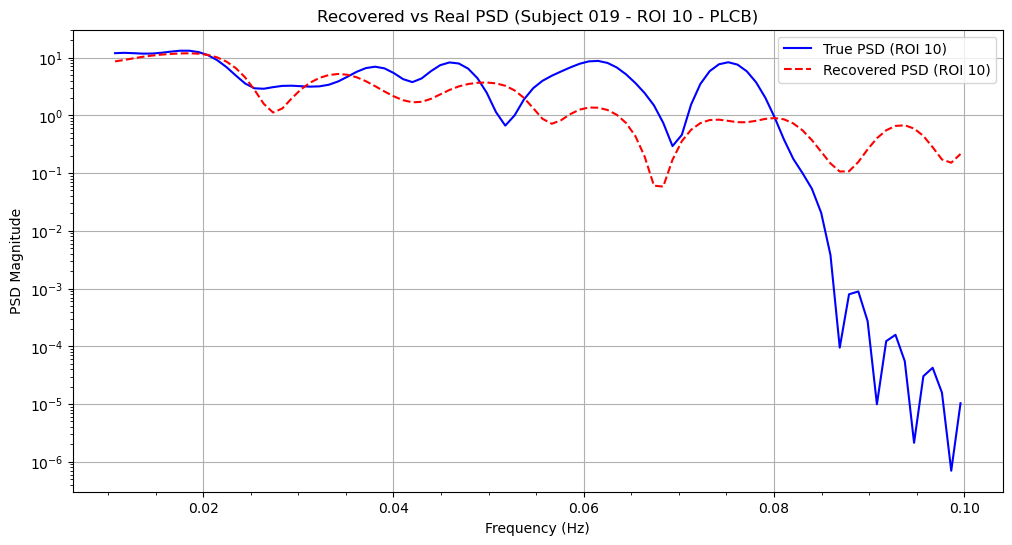

<Figure size 640x480 with 0 Axes>

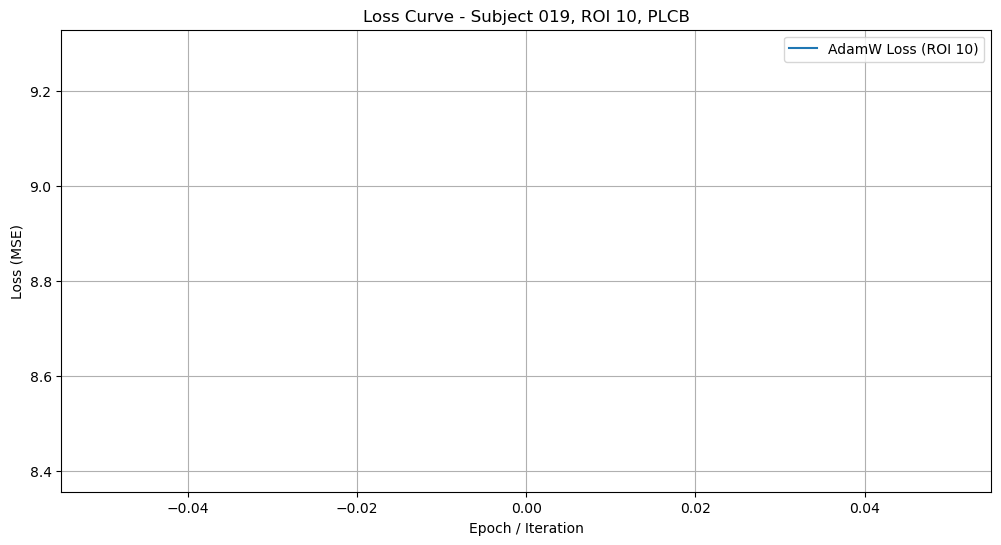

[I 2025-05-10 07:06:14,917] A new study created in memory with name: no-name-c16362d1-3152-48ea-a071-126b01a0cd5f


=== Torch Optimisation Evaluation Results ===
MSE = 8.8431e+00, NMSE = 2.5184e-01, Relative Error = 5.0183e-01
Explained Variance = 0.7208
Pearson Correlation = 0.7712, Cross-Correlation = 0.7712
Coherence = 0.7626, KL Divergence = 3.3312e-01
=== Torch Optimisation Evaluation Results ===
MSE = 5.4362e-01, NMSE = 2.3756e-01, Relative Error = 4.8740e-01
Explained Variance = 0.7388
Pearson Correlation = 0.7712, Cross-Correlation = 0.7712
Coherence = 0.7626, KL Divergence = 3.3312e-01

=== Running P-DCM for Subject 019, ROI 11, Condition: LSD ===


[I 2025-05-10 07:06:49,327] Trial 0 finished with value: 48.35161590576172 and parameters: {'phi': 1.2227658001645425, 'varphi': 0.18073112178619744, 'chi': 0.7420527823165621, 'tMTT': 0.8568189831981217, 'tau': 28.48865991449864, 'sigma': 1.5534400275826776, 'mu': 0.6064624763823867, 'lamb': 0.3425632747131837, 'alpha_v': 1.9565237669059112, 'beta_v': 3.674199345957675, 'alpha_e': 10.762305813545906, 'beta_e': 3.14012062240288}. Best is trial 0 with value: 48.35161590576172.
[I 2025-05-10 07:07:24,015] Trial 1 finished with value: 48.382259368896484 and parameters: {'phi': 1.2457411619954941, 'varphi': 0.18237509909531086, 'chi': 0.2439503790681095, 'tMTT': 2.149107265775603, 'tau': 15.960003090688154, 'sigma': 1.5149888502189641, 'mu': 1.5782976760763487, 'lamb': 0.2988869997015655, 'alpha_v': 19.95313354907154, 'beta_v': 3.098363123958855, 'alpha_e': 14.077631220814983, 'beta_e': 1.8831666399488078}. Best is trial 0 with value: 48.35161590576172.
[I 2025-05-10 07:07:51,525] Trial 2 

[Epoch 0] Loss: 30.341059


<Figure size 640x480 with 0 Axes>

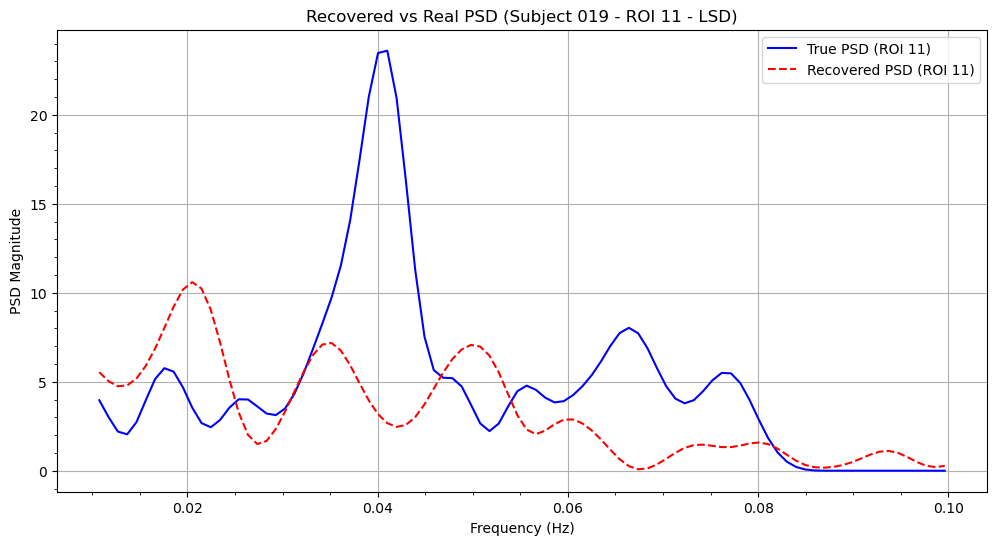

<Figure size 640x480 with 0 Axes>

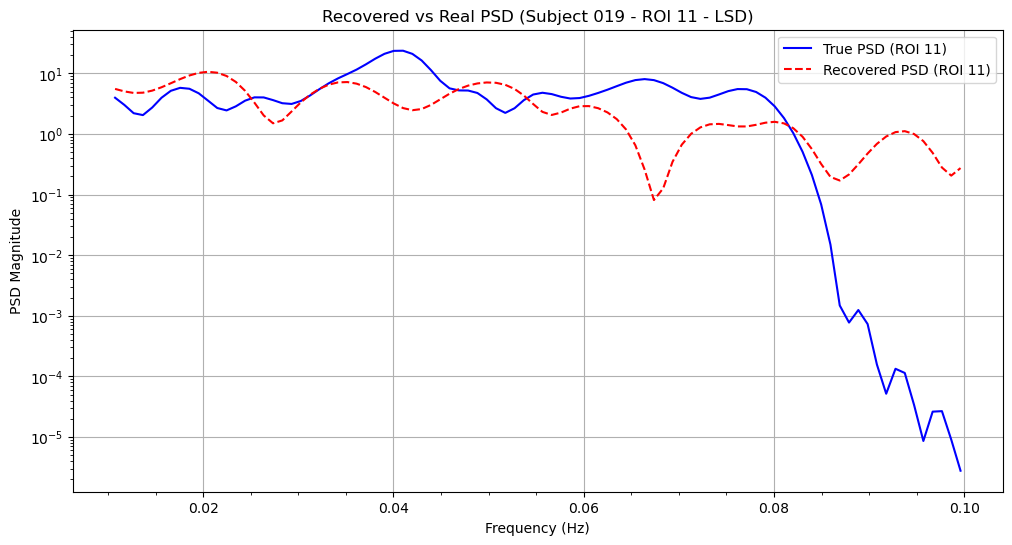

<Figure size 640x480 with 0 Axes>

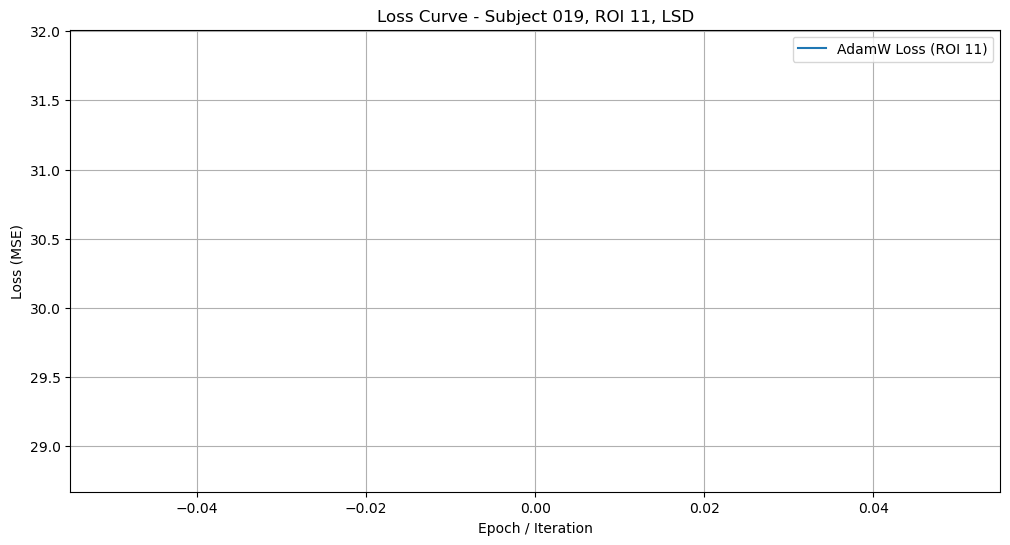

[I 2025-05-10 07:32:41,358] A new study created in memory with name: no-name-86567fdc-a82a-4903-a9e2-3ac2a3fe7923


=== Torch Optimisation Evaluation Results ===
MSE = 3.0341e+01, NMSE = 6.1501e-01, Relative Error = 7.8423e-01
Explained Variance = 0.2638
Pearson Correlation = 0.1787, Cross-Correlation = 0.1787
Coherence = 0.3852, KL Divergence = 6.1075e-01
=== Torch Optimisation Evaluation Results ===
MSE = 1.6639e+00, NMSE = 8.4834e-01, Relative Error = 9.2105e-01
Explained Variance = 0.1556
Pearson Correlation = 0.1787, Cross-Correlation = 0.1787
Coherence = 0.3852, KL Divergence = 6.1075e-01

=== Running P-DCM for Subject 019, ROI 11, Condition: PLCB ===


[I 2025-05-10 07:33:19,398] Trial 0 finished with value: 55.445281982421875 and parameters: {'phi': 1.188737221591425, 'varphi': 0.8682066266691707, 'chi': 0.47005585524991617, 'tMTT': 2.867425593834191, 'tau': 25.532854806057795, 'sigma': 1.52124730532976, 'mu': 0.36476968258505815, 'lamb': 0.03749072155383748, 'alpha_v': 6.068403715536226, 'beta_v': 3.028404444166277, 'alpha_e': 2.037751689078954, 'beta_e': 3.9740499071288977}. Best is trial 0 with value: 55.445281982421875.
[I 2025-05-10 07:33:52,312] Trial 1 finished with value: 53.54570388793945 and parameters: {'phi': 1.0809118366788946, 'varphi': 0.28461122422251545, 'chi': 0.1700686143668623, 'tMTT': 5.175518358901406, 'tau': 17.58514965595495, 'sigma': 1.6179714851691727, 'mu': 0.3257602191650737, 'lamb': 0.06039499124110456, 'alpha_v': 4.32120298389193, 'beta_v': 2.4933771579562225, 'alpha_e': 19.991700212501044, 'beta_e': 4.970973091902824}. Best is trial 1 with value: 53.54570388793945.
[I 2025-05-10 07:34:41,855] Trial 2 f

[Epoch 0] Loss: 7.578627


<Figure size 640x480 with 0 Axes>

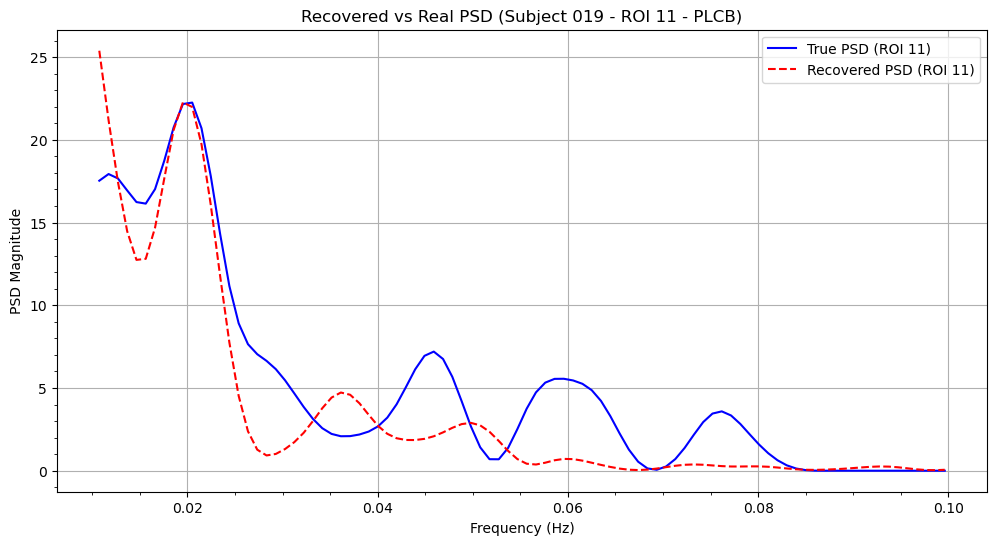

<Figure size 640x480 with 0 Axes>

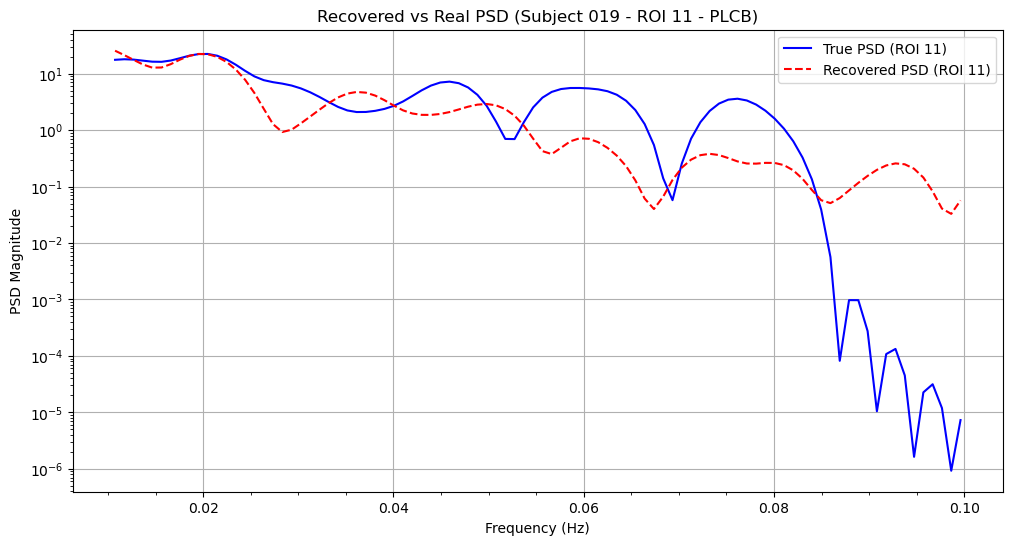

<Figure size 640x480 with 0 Axes>

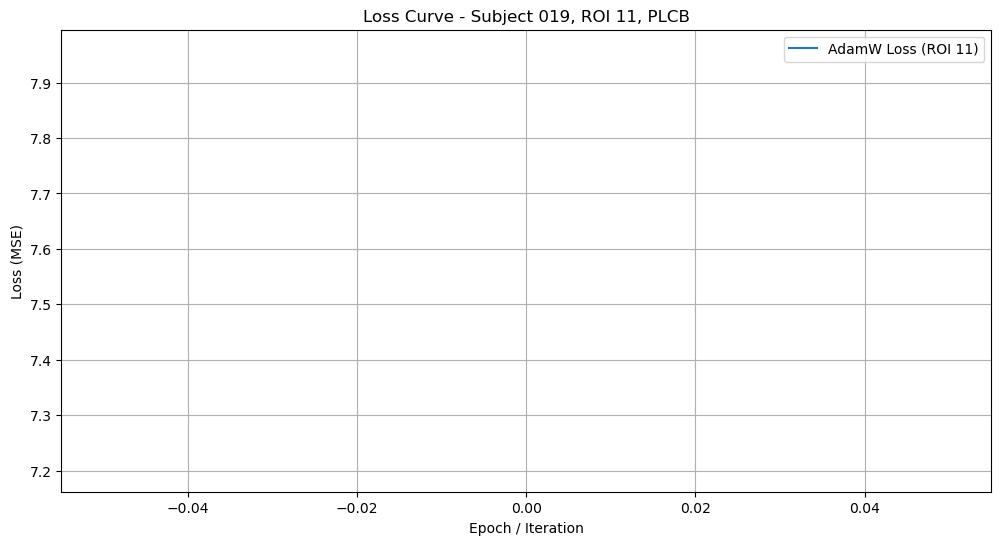

[I 2025-05-10 07:59:15,434] A new study created in memory with name: no-name-70e73dd6-e0a8-401e-aed5-12eab160e481


=== Torch Optimisation Evaluation Results ===
MSE = 7.5786e+00, NMSE = 1.1847e-01, Relative Error = 3.4420e-01
Explained Variance = 0.9080
Pearson Correlation = 0.9276, Cross-Correlation = 0.9276
Coherence = 0.8820, KL Divergence = 3.0891e-01
=== Torch Optimisation Evaluation Results ===
MSE = 2.0398e-01, NMSE = 1.2043e-01, Relative Error = 3.4704e-01
Explained Variance = 0.9107
Pearson Correlation = 0.9276, Cross-Correlation = 0.9276
Coherence = 0.8820, KL Divergence = 3.0891e-01

=== Running P-DCM for Subject 019, ROI 12, Condition: LSD ===


[I 2025-05-10 07:59:41,864] Trial 0 finished with value: 37.20114517211914 and parameters: {'phi': 1.3698279421807604, 'varphi': 0.47887743139969235, 'chi': 0.9707194794055349, 'tMTT': 3.0000924607108455, 'tau': 19.050027862785043, 'sigma': 0.5593426856153918, 'mu': 1.195239269239793, 'lamb': 0.3453861232991053, 'alpha_v': 19.481711468558085, 'beta_v': 4.921167671136091, 'alpha_e': 8.06445130466067, 'beta_e': 4.191127855138816}. Best is trial 0 with value: 37.20114517211914.
[I 2025-05-10 08:00:17,123] Trial 1 finished with value: 39.248226165771484 and parameters: {'phi': 1.7710422813449127, 'varphi': 0.23150697335609444, 'chi': 0.20831341165802653, 'tMTT': 4.39708317120501, 'tau': 18.18058406529641, 'sigma': 1.4379383411995734, 'mu': 0.5198244627162474, 'lamb': 0.3407673311615119, 'alpha_v': 4.617134028249887, 'beta_v': 1.057614513814239, 'alpha_e': 9.809667725905294, 'beta_e': 3.700245670087101}. Best is trial 0 with value: 37.20114517211914.
[I 2025-05-10 08:00:40,940] Trial 2 fini

[Epoch 0] Loss: 23.630053


<Figure size 640x480 with 0 Axes>

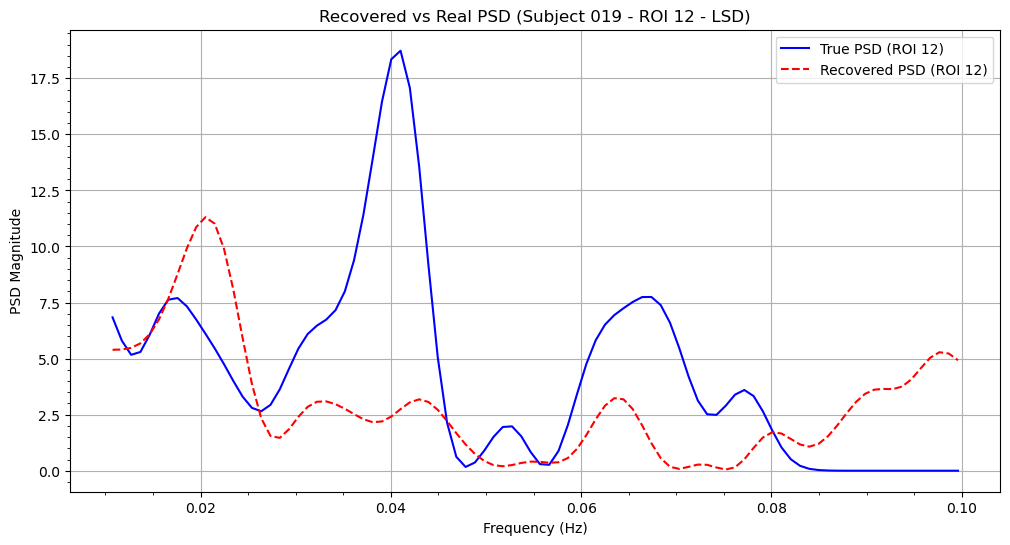

<Figure size 640x480 with 0 Axes>

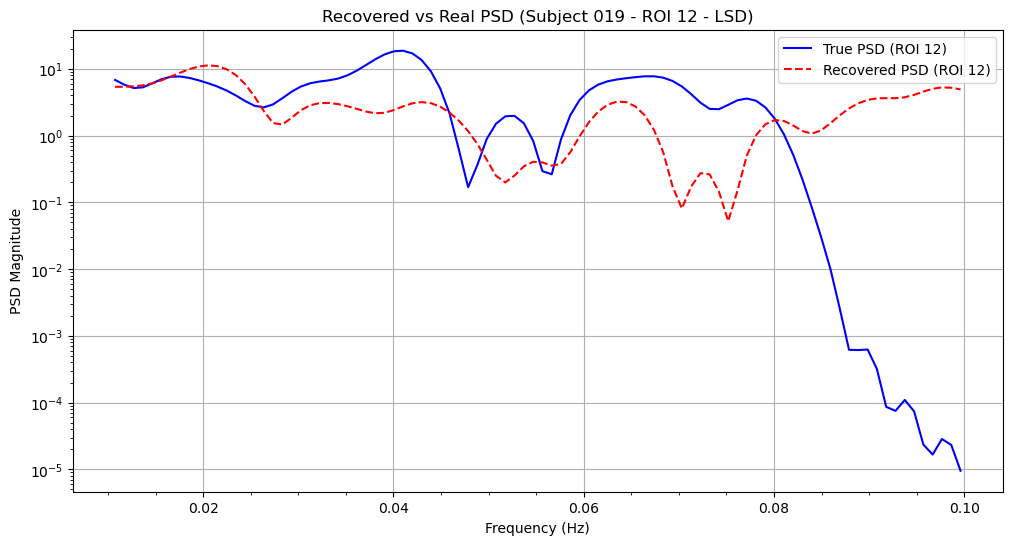

<Figure size 640x480 with 0 Axes>

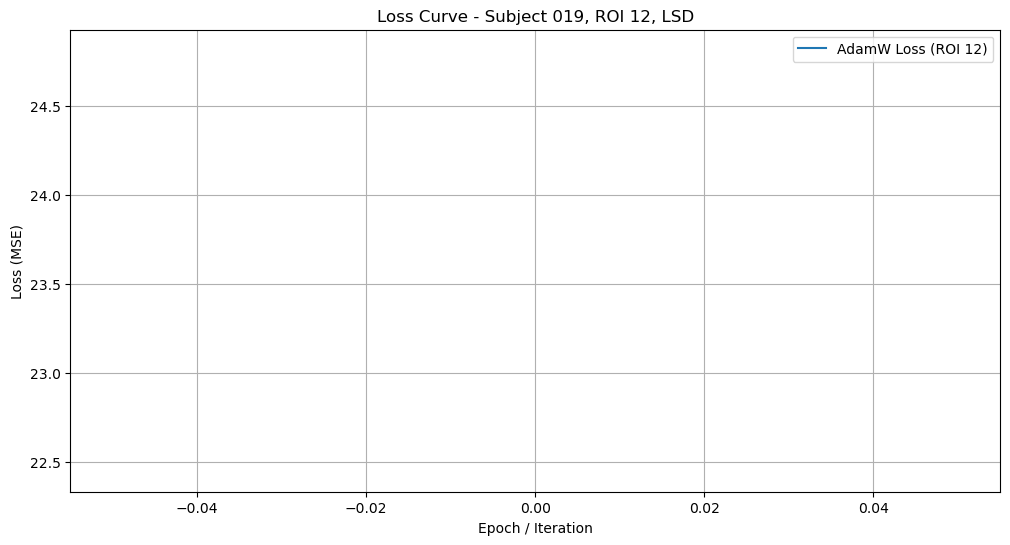

[I 2025-05-10 08:23:16,453] A new study created in memory with name: no-name-1ac56ce5-f2f1-4eef-8389-7ed4810544c0


=== Torch Optimisation Evaluation Results ===
MSE = 2.3630e+01, NMSE = 6.2593e-01, Relative Error = 7.9116e-01
Explained Variance = 0.3910
Pearson Correlation = 0.1768, Cross-Correlation = 0.1768
Coherence = 0.3753, KL Divergence = 7.4673e-01
=== Torch Optimisation Evaluation Results ===
MSE = 1.6362e+00, NMSE = 8.1169e-01, Relative Error = 9.0094e-01
Explained Variance = 0.3229
Pearson Correlation = 0.1768, Cross-Correlation = 0.1768
Coherence = 0.3753, KL Divergence = 7.4673e-01

=== Running P-DCM for Subject 019, ROI 12, Condition: PLCB ===


[I 2025-05-10 08:23:46,762] Trial 0 finished with value: 66.06660461425781 and parameters: {'phi': 1.8739344739946517, 'varphi': 0.2889287662660223, 'chi': 0.23796389849912125, 'tMTT': 0.9438111025585922, 'tau': 26.90684050998314, 'sigma': 0.7740903244511135, 'mu': 1.3596900929254767, 'lamb': 0.16268057787092602, 'alpha_v': 7.94980498611097, 'beta_v': 4.812885406928929, 'alpha_e': 9.548394330862875, 'beta_e': 2.7290042605260765}. Best is trial 0 with value: 66.06660461425781.
[W 2025-05-10 08:24:19,604] Trial 1 failed with parameters: {'phi': 1.9726592308132398, 'varphi': 0.17196717807278758, 'chi': 0.22106598277233688, 'tMTT': 3.333228283608303, 'tau': 0.05538374244058275, 'sigma': 0.9934151588709319, 'mu': 0.8647785051397074, 'lamb': 0.20891126498417517, 'alpha_v': 8.846683503440094, 'beta_v': 4.250190116996091, 'alpha_e': 1.050544077142542, 'beta_e': 4.614859183010548} because of the following error: The value nan is not acceptable.
[W 2025-05-10 08:24:19,613] Trial 1 failed with va

[Epoch 0] Loss: 26.588034


<Figure size 640x480 with 0 Axes>

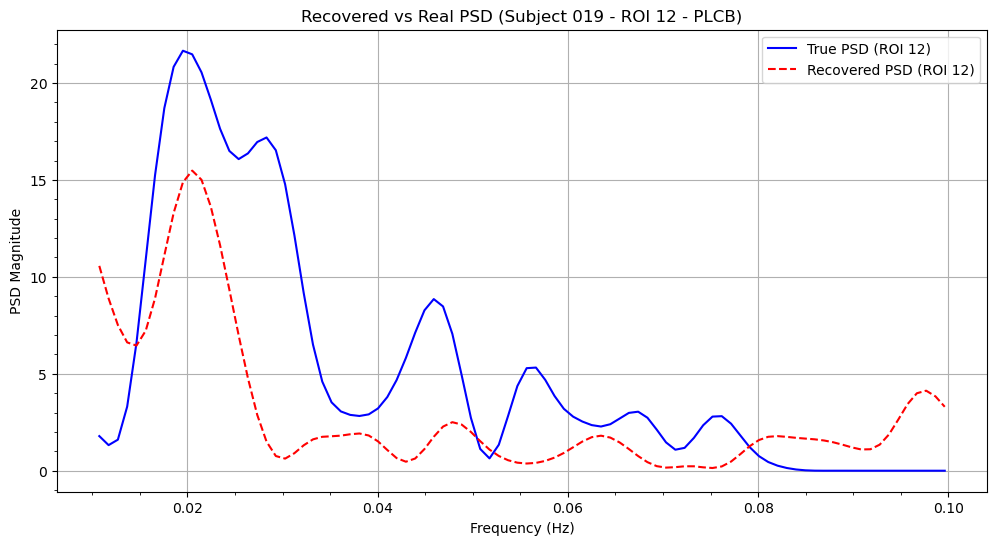

<Figure size 640x480 with 0 Axes>

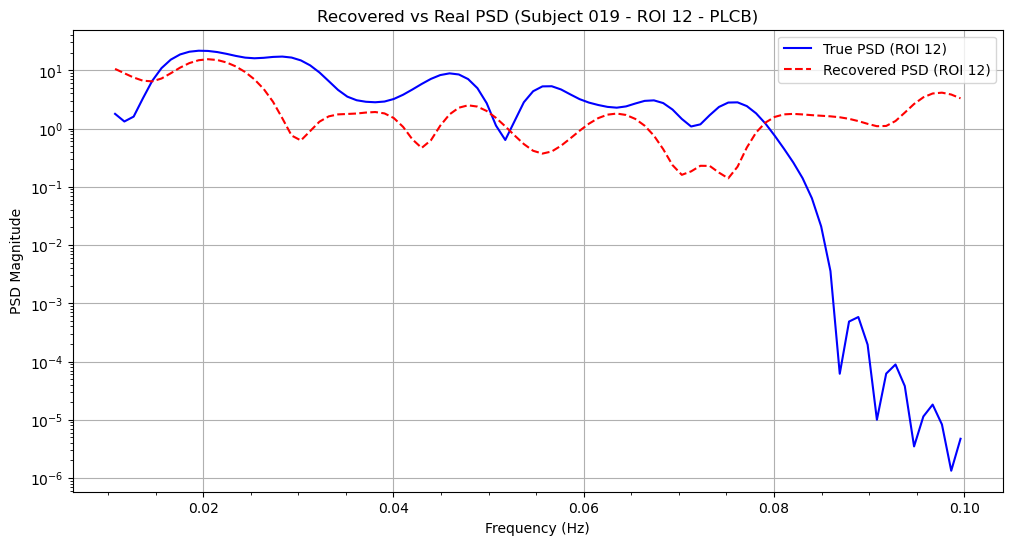

<Figure size 640x480 with 0 Axes>

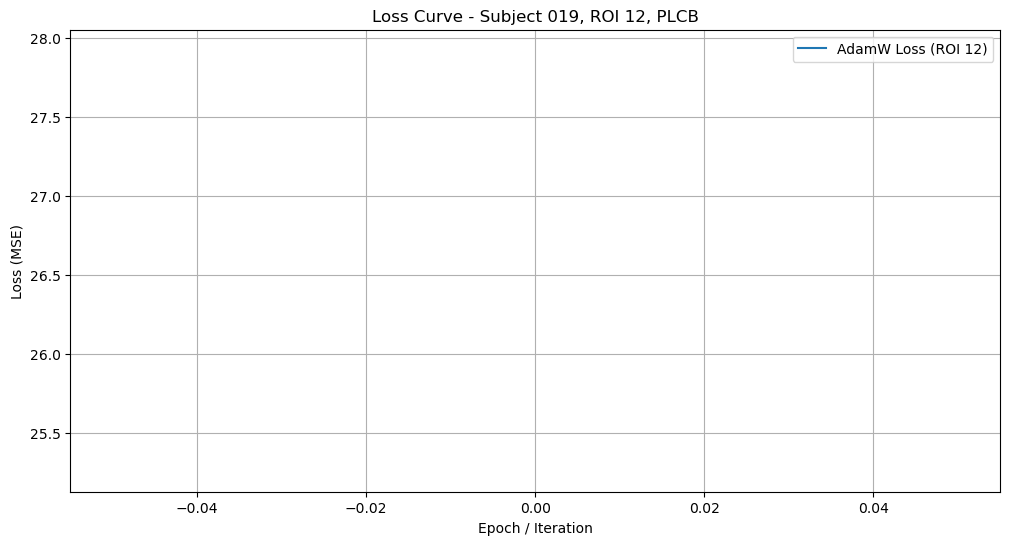

[I 2025-05-10 08:41:00,964] A new study created in memory with name: no-name-21f4772f-a92b-4a33-8670-bdb0b83b0b27


=== Torch Optimisation Evaluation Results ===
MSE = 2.6588e+01, NMSE = 3.9994e-01, Relative Error = 6.3241e-01
Explained Variance = 0.6814
Pearson Correlation = 0.6699, Cross-Correlation = 0.6699
Coherence = 0.6451, KL Divergence = 5.9591e-01
=== Torch Optimisation Evaluation Results ===
MSE = 6.5594e-01, NMSE = 3.8383e-01, Relative Error = 6.1954e-01
Explained Variance = 0.6603
Pearson Correlation = 0.6699, Cross-Correlation = 0.6699
Coherence = 0.6451, KL Divergence = 5.9591e-01

=== Running P-DCM for Subject 019, ROI 13, Condition: LSD ===


[I 2025-05-10 08:41:17,429] Trial 0 finished with value: 71.0123519897461 and parameters: {'phi': 1.9070141913361518, 'varphi': 0.8719790877273838, 'chi': 0.8981318527336574, 'tMTT': 1.8234285975622684, 'tau': 12.674778866565958, 'sigma': 0.8320465972075932, 'mu': 0.01378523984486546, 'lamb': 0.16066587049973363, 'alpha_v': 12.332758308594379, 'beta_v': 4.66181039907821, 'alpha_e': 11.863622802919805, 'beta_e': 0.6406607609637341}. Best is trial 0 with value: 71.0123519897461.
[I 2025-05-10 08:41:35,186] Trial 1 finished with value: 76.64551544189453 and parameters: {'phi': 1.1361300002857302, 'varphi': 0.3981006123523154, 'chi': 0.9626212650526347, 'tMTT': 5.140605530331291, 'tau': 16.25523153842043, 'sigma': 0.7944904501656169, 'mu': 1.0030807634961936, 'lamb': 0.20293486462192317, 'alpha_v': 4.926602356290514, 'beta_v': 4.731652313403151, 'alpha_e': 6.792868958998698, 'beta_e': 3.696136805988235}. Best is trial 0 with value: 71.0123519897461.
[I 2025-05-10 08:41:54,372] Trial 2 fini

[Epoch 0] Loss: 61.157310


<Figure size 640x480 with 0 Axes>

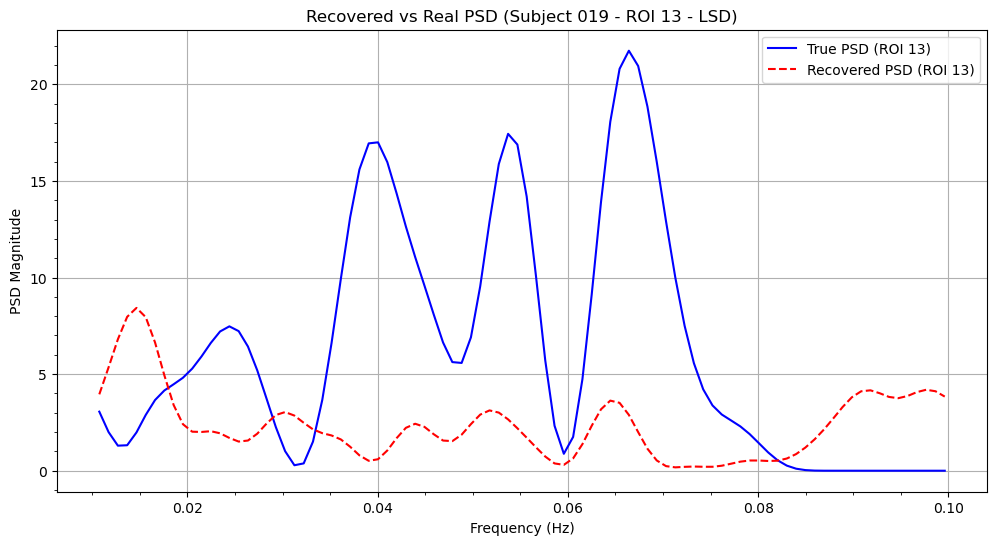

<Figure size 640x480 with 0 Axes>

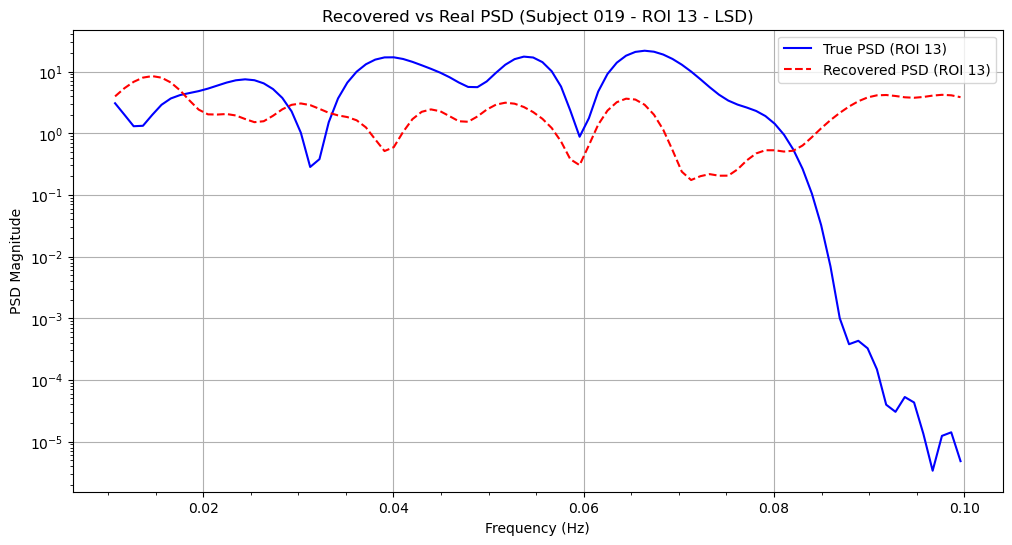

<Figure size 640x480 with 0 Axes>

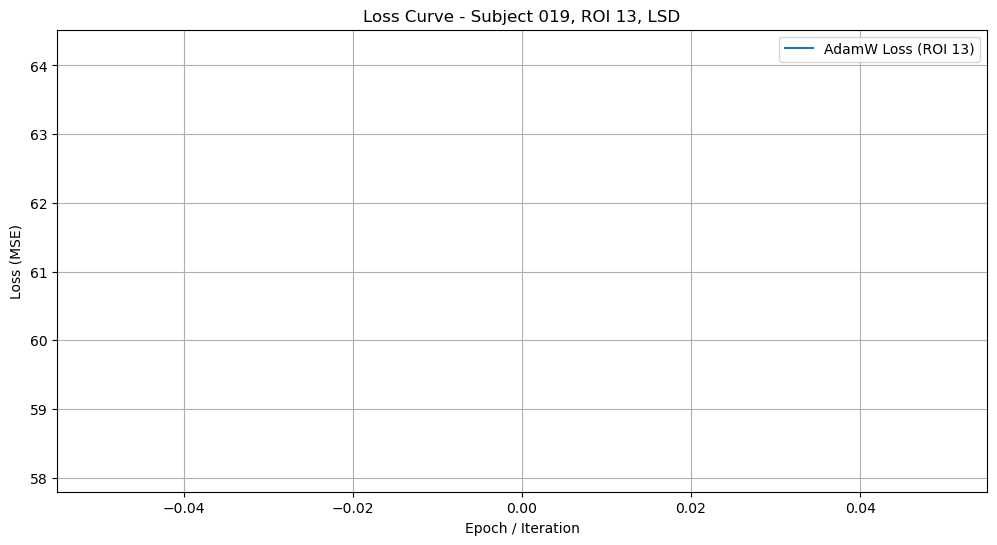

[I 2025-05-10 08:55:21,581] A new study created in memory with name: no-name-9bfaadb2-bce1-43d4-bfe7-eec4bb886471


=== Torch Optimisation Evaluation Results ===
MSE = 6.1157e+01, NMSE = 7.9292e-01, Relative Error = 8.9046e-01
Explained Variance = 0.3350
Pearson Correlation = -0.2196, Cross-Correlation = -0.2196
Coherence = 0.2269, KL Divergence = 9.5564e-01
=== Torch Optimisation Evaluation Results ===
MSE = 2.4973e+00, NMSE = 1.2338e+00, Relative Error = 1.1108e+00
Explained Variance = -0.0891
Pearson Correlation = -0.2196, Cross-Correlation = -0.2196
Coherence = 0.2269, KL Divergence = 9.5564e-01

=== Running P-DCM for Subject 019, ROI 13, Condition: PLCB ===


[I 2025-05-10 08:55:35,335] Trial 0 finished with value: 61.735557556152344 and parameters: {'phi': 1.034457239602356, 'varphi': 0.9599735960011764, 'chi': 0.24173255783684677, 'tMTT': 0.8894072562683404, 'tau': 19.524505288352156, 'sigma': 1.1765655507599282, 'mu': 0.2936520248446888, 'lamb': 0.012409874297712991, 'alpha_v': 6.521281395724727, 'beta_v': 3.9436988682724476, 'alpha_e': 19.803937962556283, 'beta_e': 0.5466438012823956}. Best is trial 0 with value: 61.735557556152344.
[I 2025-05-10 08:55:48,362] Trial 1 finished with value: 57.202823638916016 and parameters: {'phi': 1.8347228742851636, 'varphi': 0.4975068769269294, 'chi': 0.6412440656593577, 'tMTT': 4.000811321471535, 'tau': 12.279261446304616, 'sigma': 0.9839124206741156, 'mu': 1.7684529471557657, 'lamb': 0.3009246785560662, 'alpha_v': 6.487345233780077, 'beta_v': 3.552943359139711, 'alpha_e': 12.410798937900207, 'beta_e': 1.6338950672724009}. Best is trial 1 with value: 57.202823638916016.
[I 2025-05-10 08:56:07,942] Tr

[Epoch 0] Loss: 13.972958


<Figure size 640x480 with 0 Axes>

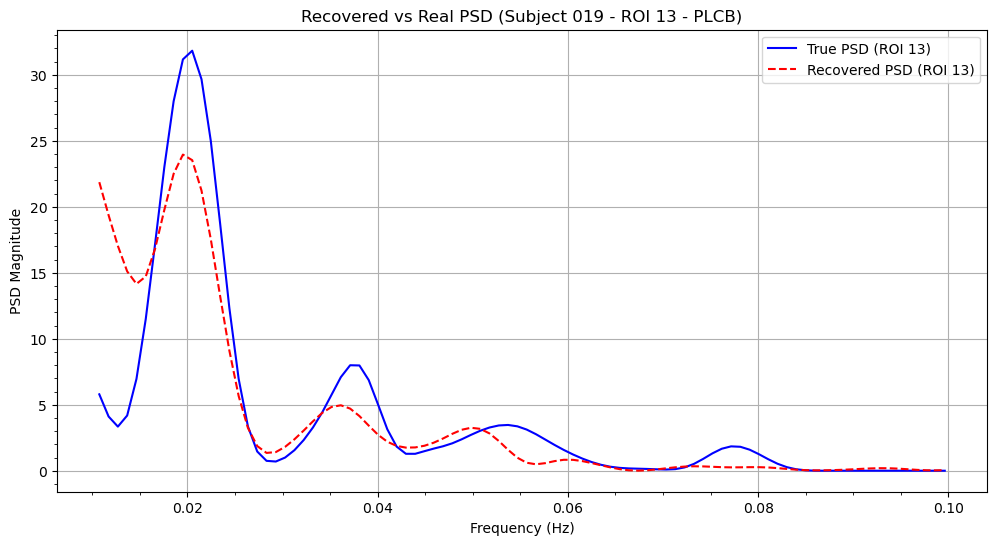

<Figure size 640x480 with 0 Axes>

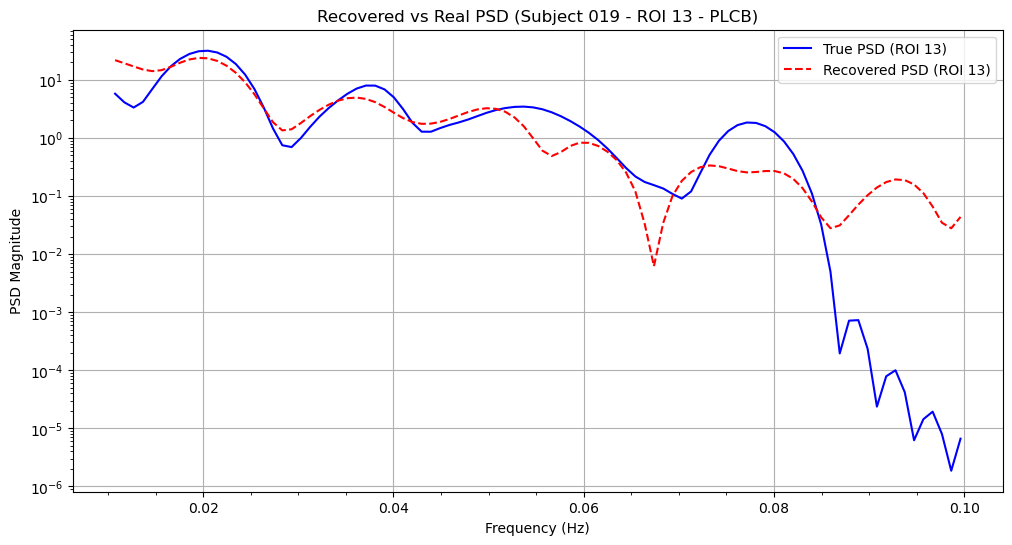

<Figure size 640x480 with 0 Axes>

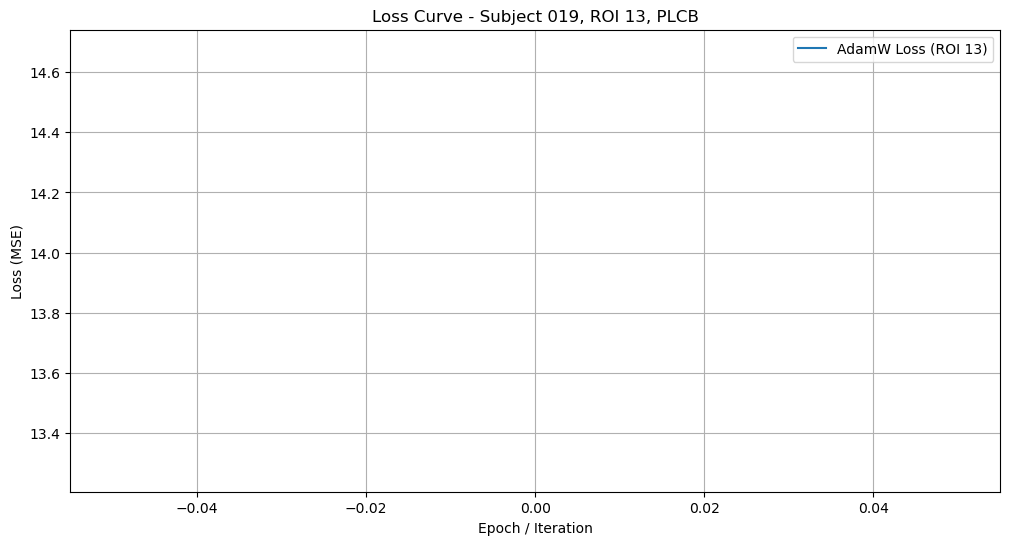

[I 2025-05-10 09:09:48,319] A new study created in memory with name: no-name-99d27ad6-a96b-447e-b459-519ab679439b


=== Torch Optimisation Evaluation Results ===
MSE = 1.3973e+01, NMSE = 2.0101e-01, Relative Error = 4.4835e-01
Explained Variance = 0.7971
Pearson Correlation = 0.8569, Cross-Correlation = 0.8569
Coherence = 0.7996, KL Divergence = 1.8355e-01
=== Torch Optimisation Evaluation Results ===
MSE = 2.8419e-01, NMSE = 2.1495e-01, Relative Error = 4.6362e-01
Explained Variance = 0.7752
Pearson Correlation = 0.8569, Cross-Correlation = 0.8569
Coherence = 0.7996, KL Divergence = 1.8355e-01

=== Running P-DCM for Subject 019, ROI 14, Condition: LSD ===


[I 2025-05-10 09:10:09,635] Trial 0 finished with value: 50.246463775634766 and parameters: {'phi': 1.1026713396240886, 'varphi': 0.8116298430120181, 'chi': 0.15583874624364188, 'tMTT': 1.8953907144782192, 'tau': 20.829530845098553, 'sigma': 1.6654940697785425, 'mu': 1.5600939601765778, 'lamb': 0.2973697658321036, 'alpha_v': 13.645317951113269, 'beta_v': 2.42451905819701, 'alpha_e': 5.996388709973214, 'beta_e': 0.6995153459199878}. Best is trial 0 with value: 50.246463775634766.
[I 2025-05-10 09:10:24,735] Trial 1 finished with value: 63.088924407958984 and parameters: {'phi': 1.3183883224293917, 'varphi': 0.6344090344742257, 'chi': 0.32660512230813726, 'tMTT': 4.562630602014096, 'tau': 20.44232011101585, 'sigma': 1.2387937073720034, 'mu': 1.1635158456762325, 'lamb': 0.04067668657926544, 'alpha_v': 18.654807080775818, 'beta_v': 4.81139955595939, 'alpha_e': 0.7568133540114116, 'beta_e': 0.45866732945228966}. Best is trial 0 with value: 50.246463775634766.
[I 2025-05-10 09:10:47,071] Tri

[Epoch 0] Loss: 29.029819


<Figure size 640x480 with 0 Axes>

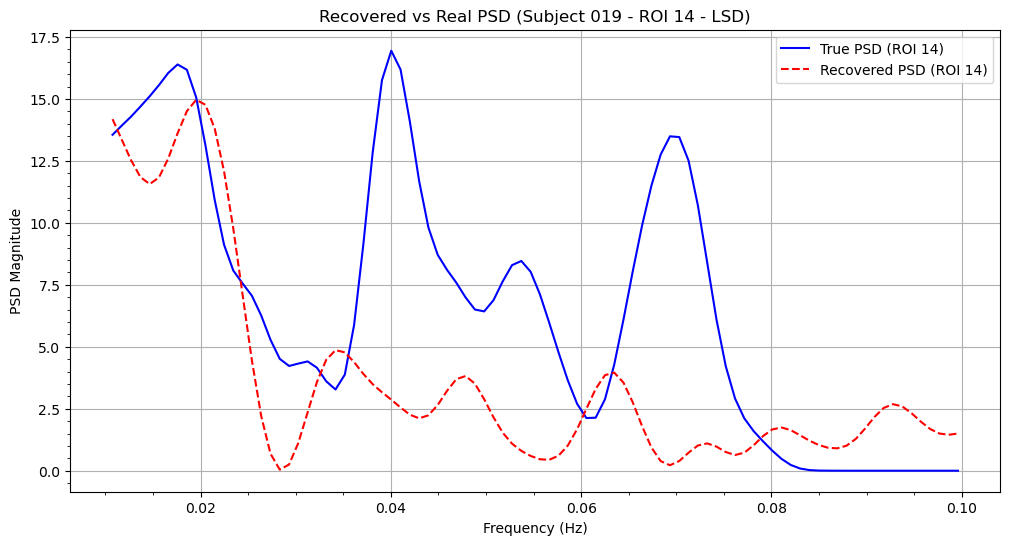

<Figure size 640x480 with 0 Axes>

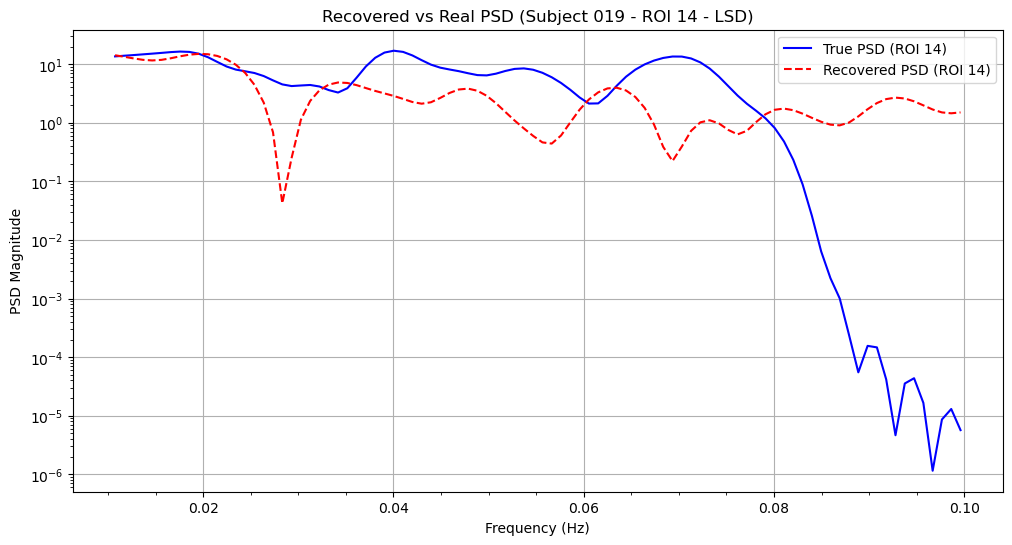

<Figure size 640x480 with 0 Axes>

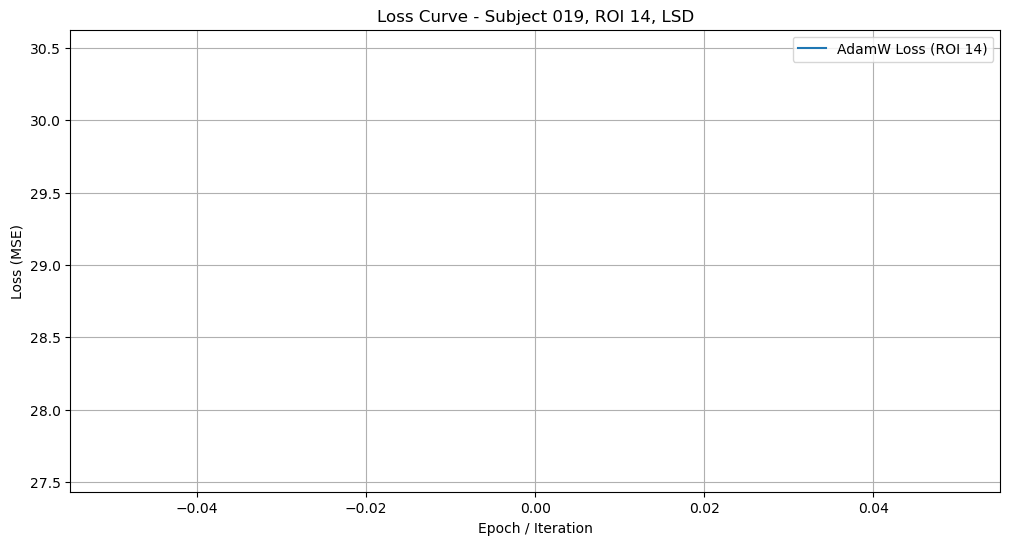

[I 2025-05-10 09:23:41,999] A new study created in memory with name: no-name-8a855e8b-46a3-49a9-a418-7eab6e4d7c50


=== Torch Optimisation Evaluation Results ===
MSE = 2.9030e+01, NMSE = 4.0326e-01, Relative Error = 6.3503e-01
Explained Variance = 0.5311
Pearson Correlation = 0.5634, Cross-Correlation = 0.5634
Coherence = 0.6128, KL Divergence = 5.9821e-01
=== Torch Optimisation Evaluation Results ===
MSE = 9.8664e-01, NMSE = 3.9041e-01, Relative Error = 6.2483e-01
Explained Variance = 0.5812
Pearson Correlation = 0.5634, Cross-Correlation = 0.5634
Coherence = 0.6128, KL Divergence = 5.9821e-01

=== Running P-DCM for Subject 019, ROI 14, Condition: PLCB ===


[I 2025-05-10 09:24:01,184] Trial 0 finished with value: 22.259746551513672 and parameters: {'phi': 1.7924565474326215, 'varphi': 0.1592609716566174, 'chi': 0.6591391680515079, 'tMTT': 4.691379262390675, 'tau': 15.815854670722782, 'sigma': 0.8937989536402251, 'mu': 0.8049469301282948, 'lamb': 0.12637179908084034, 'alpha_v': 9.253257900484439, 'beta_v': 3.790304645644154, 'alpha_e': 9.022260831781763, 'beta_e': 3.4040971496732984}. Best is trial 0 with value: 22.259746551513672.
[I 2025-05-10 09:24:21,682] Trial 1 finished with value: 6.180861949920654 and parameters: {'phi': 1.7824426432523153, 'varphi': 0.6291257456618817, 'chi': 0.2026323332549891, 'tMTT': 1.5923988187702616, 'tau': 18.24590155365373, 'sigma': 1.383556524739918, 'mu': 0.855443061094205, 'lamb': 0.13402611449732027, 'alpha_v': 6.891522169721902, 'beta_v': 0.6262162842055639, 'alpha_e': 7.081931967274955, 'beta_e': 4.857236027072281}. Best is trial 1 with value: 6.180861949920654.
[I 2025-05-10 09:24:34,686] Trial 2 fi

[Epoch 0] Loss: 6.180862


<Figure size 640x480 with 0 Axes>

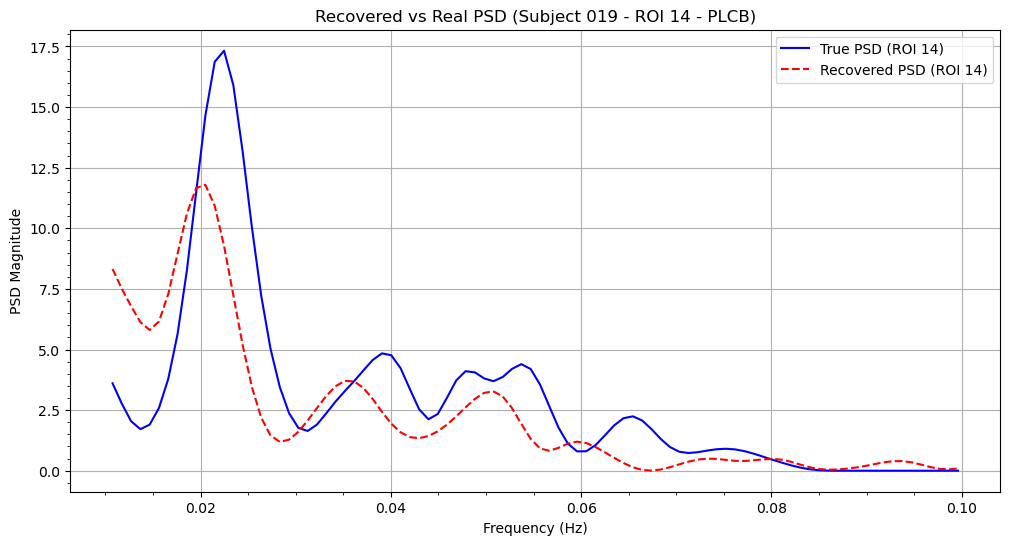

<Figure size 640x480 with 0 Axes>

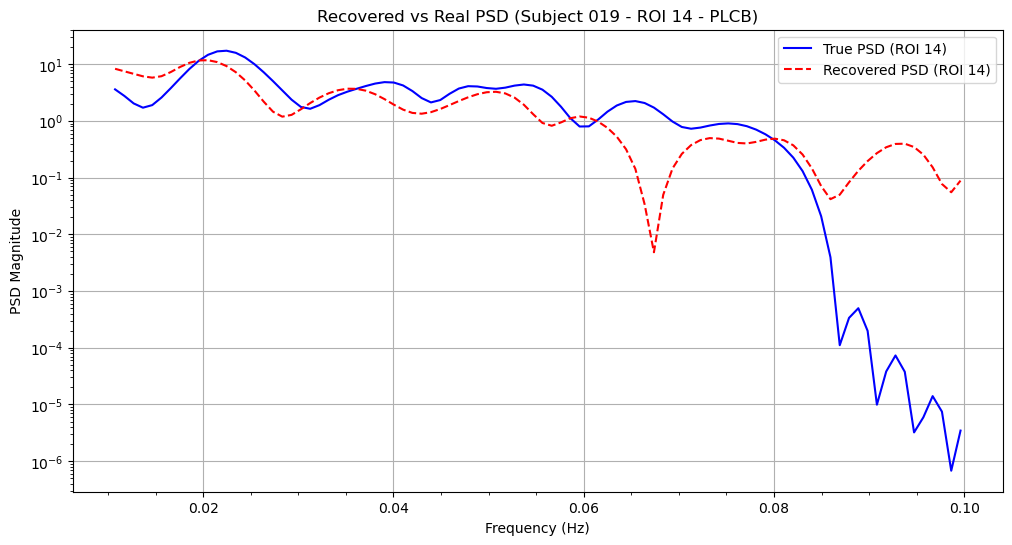

<Figure size 640x480 with 0 Axes>

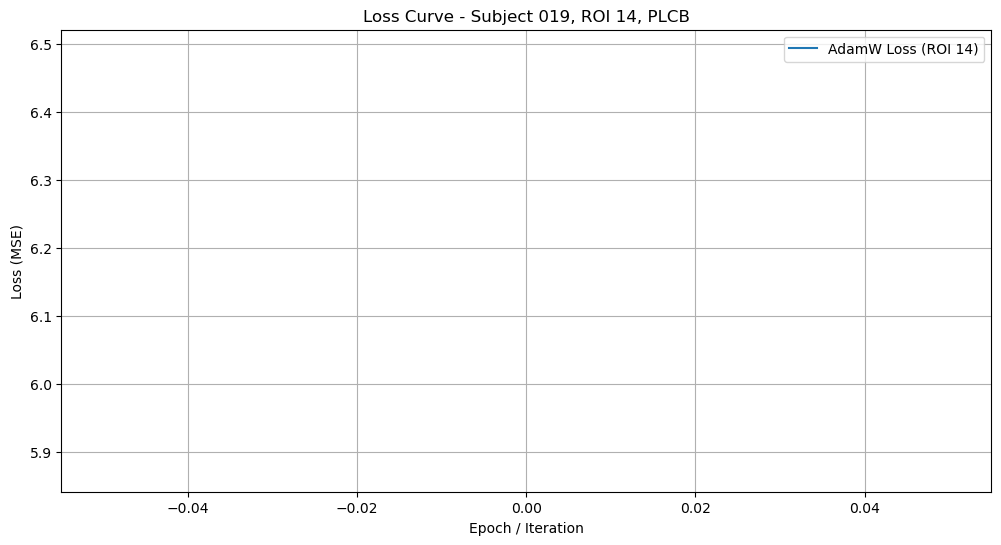

[I 2025-05-10 09:38:02,560] A new study created in memory with name: no-name-73807d42-7c47-47cd-8401-9baa7fc555e4


=== Torch Optimisation Evaluation Results ===
MSE = 6.1809e+00, NMSE = 2.7122e-01, Relative Error = 5.2079e-01
Explained Variance = 0.7328
Pearson Correlation = 0.7656, Cross-Correlation = 0.7656
Coherence = 0.7340, KL Divergence = 2.8023e-01
=== Torch Optimisation Evaluation Results ===
MSE = 4.6365e-01, NMSE = 2.8622e-01, Relative Error = 5.3499e-01
Explained Variance = 0.7153
Pearson Correlation = 0.7656, Cross-Correlation = 0.7656
Coherence = 0.7340, KL Divergence = 2.8023e-01

=== Running P-DCM for Subject 019, ROI 15, Condition: LSD ===


[W 2025-05-10 09:38:17,482] Trial 0 failed with parameters: {'phi': 1.0585915911168087, 'varphi': 0.13273837540582448, 'chi': 0.2966404911340842, 'tMTT': 3.2668360928007933, 'tau': 16.872497869833907, 'sigma': 1.1219339042741066, 'mu': 0.03951841139235368, 'lamb': 0.16517829189557778, 'alpha_v': 6.772312465242182, 'beta_v': 4.654777067943596, 'alpha_e': 8.423584685247334, 'beta_e': 2.4851825054230767} because of the following error: The value nan is not acceptable.
[W 2025-05-10 09:38:17,488] Trial 0 failed with value nan.
[I 2025-05-10 09:38:39,228] Trial 1 finished with value: 24.623136520385742 and parameters: {'phi': 1.3340907546727707, 'varphi': 0.41998336217022025, 'chi': 0.42979853865643025, 'tMTT': 2.072693634623843, 'tau': 20.669239930025103, 'sigma': 0.8605556408212742, 'mu': 0.3535665905838974, 'lamb': 0.1708869015291147, 'alpha_v': 14.49059645215298, 'beta_v': 0.7072340596838341, 'alpha_e': 18.640968780528116, 'beta_e': 2.519612394645014}. Best is trial 1 with value: 24.623

[Epoch 0] Loss: 24.623137


<Figure size 640x480 with 0 Axes>

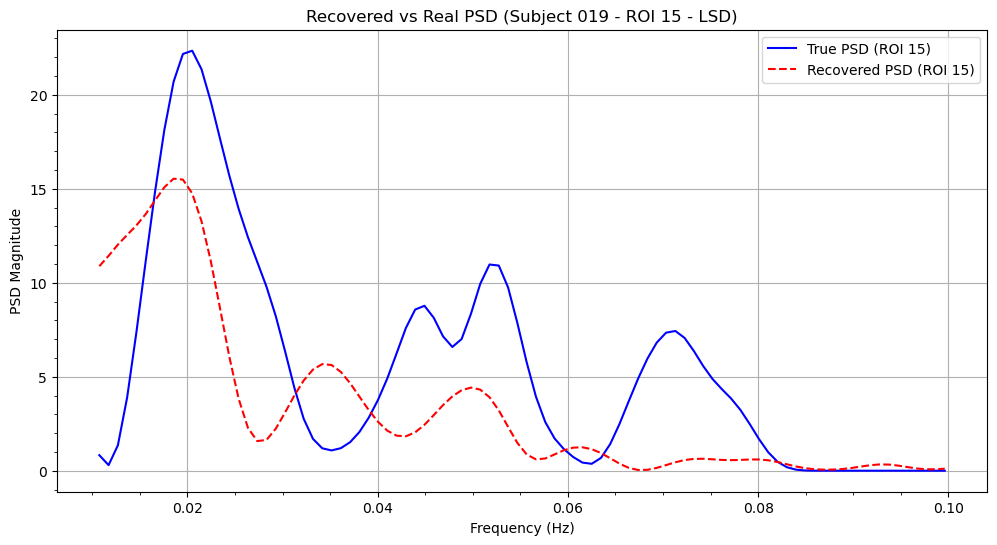

<Figure size 640x480 with 0 Axes>

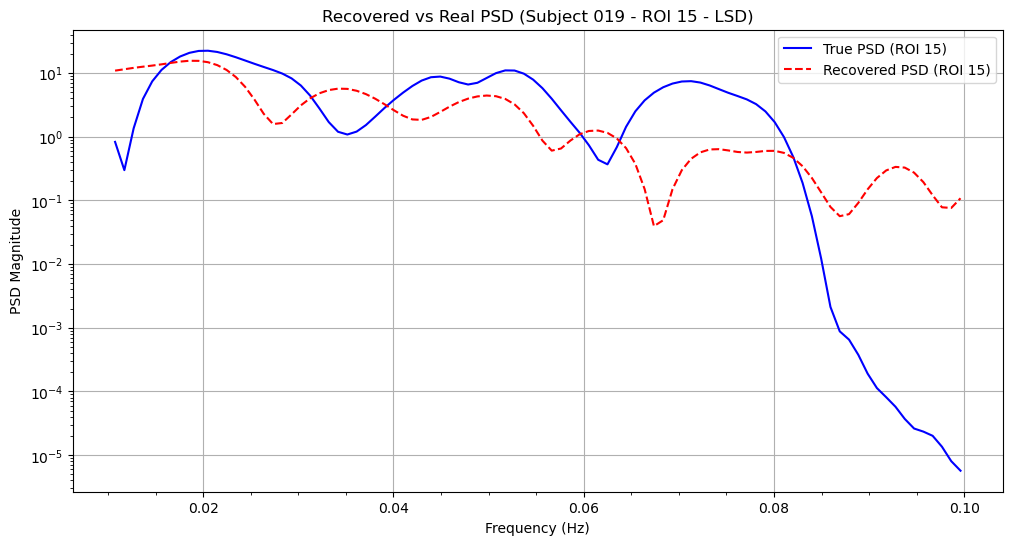

<Figure size 640x480 with 0 Axes>

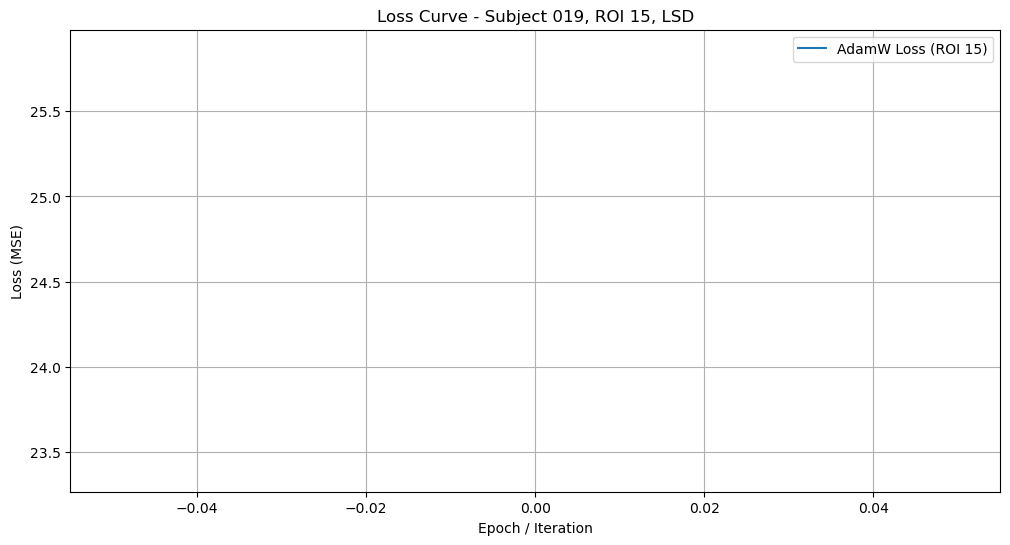

[I 2025-05-10 09:51:40,646] A new study created in memory with name: no-name-d47dfcce-32d6-4776-922b-849765a783f6


=== Torch Optimisation Evaluation Results ===
MSE = 2.4623e+01, NMSE = 3.8747e-01, Relative Error = 6.2247e-01
Explained Variance = 0.6901
Pearson Correlation = 0.6406, Cross-Correlation = 0.6406
Coherence = 0.6201, KL Divergence = 5.5275e-01
=== Torch Optimisation Evaluation Results ===
MSE = 7.4138e-01, NMSE = 3.9668e-01, Relative Error = 6.2982e-01
Explained Variance = 0.6513
Pearson Correlation = 0.6406, Cross-Correlation = 0.6406
Coherence = 0.6201, KL Divergence = 5.5275e-01

=== Running P-DCM for Subject 019, ROI 15, Condition: PLCB ===


[I 2025-05-10 09:51:58,471] Trial 0 finished with value: 67.8783187866211 and parameters: {'phi': 1.8121277635406874, 'varphi': 0.25718205240818437, 'chi': 0.7137526160483298, 'tMTT': 1.2679123932563163, 'tau': 2.251687154838219, 'sigma': 0.8155120844482171, 'mu': 0.08476661542066855, 'lamb': 0.15669585858889323, 'alpha_v': 2.8977843439541573, 'beta_v': 4.399908117115444, 'alpha_e': 15.65397626999941, 'beta_e': 0.38288240952729663}. Best is trial 0 with value: 67.8783187866211.
[I 2025-05-10 09:52:14,254] Trial 1 finished with value: 52.425235748291016 and parameters: {'phi': 1.4153549777133838, 'varphi': 0.9367637050458192, 'chi': 0.8712686020334378, 'tMTT': 4.03836576860297, 'tau': 18.142498026046066, 'sigma': 1.820734844450331, 'mu': 0.656503016525374, 'lamb': 0.06334456733626496, 'alpha_v': 15.08624341903025, 'beta_v': 4.735588269414024, 'alpha_e': 11.445638781409569, 'beta_e': 1.1662359145770222}. Best is trial 1 with value: 52.425235748291016.
[I 2025-05-10 09:52:28,727] Trial 2 

[Epoch 0] Loss: 39.376076


<Figure size 640x480 with 0 Axes>

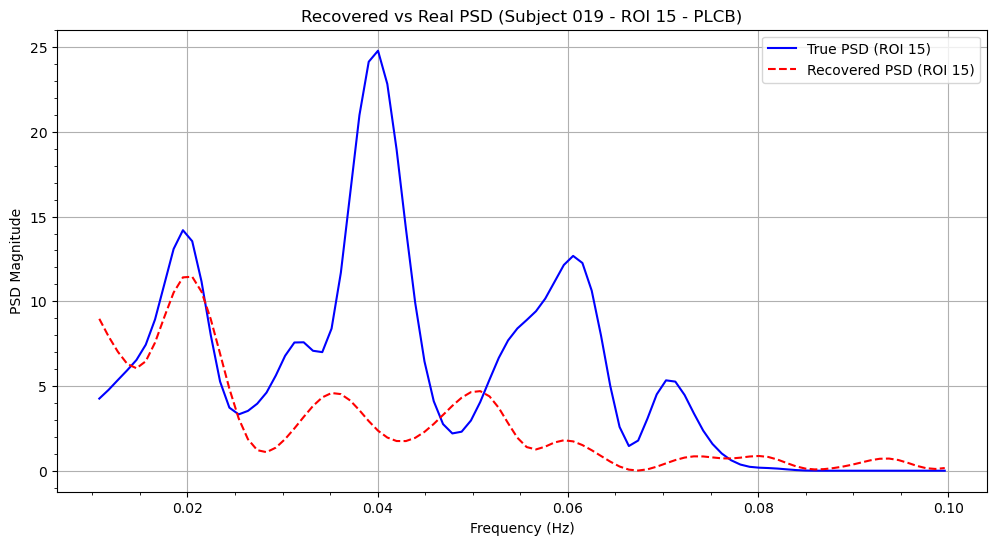

<Figure size 640x480 with 0 Axes>

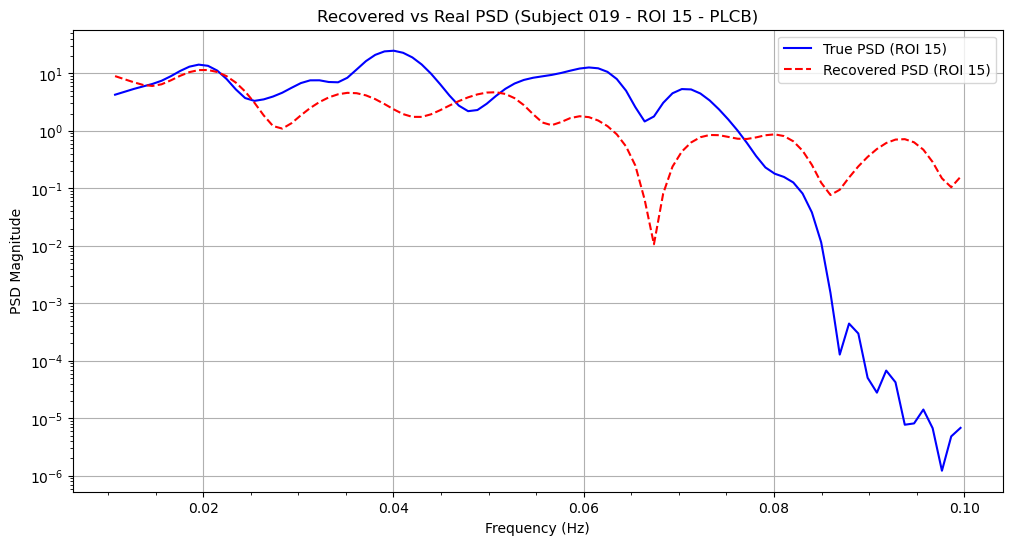

<Figure size 640x480 with 0 Axes>

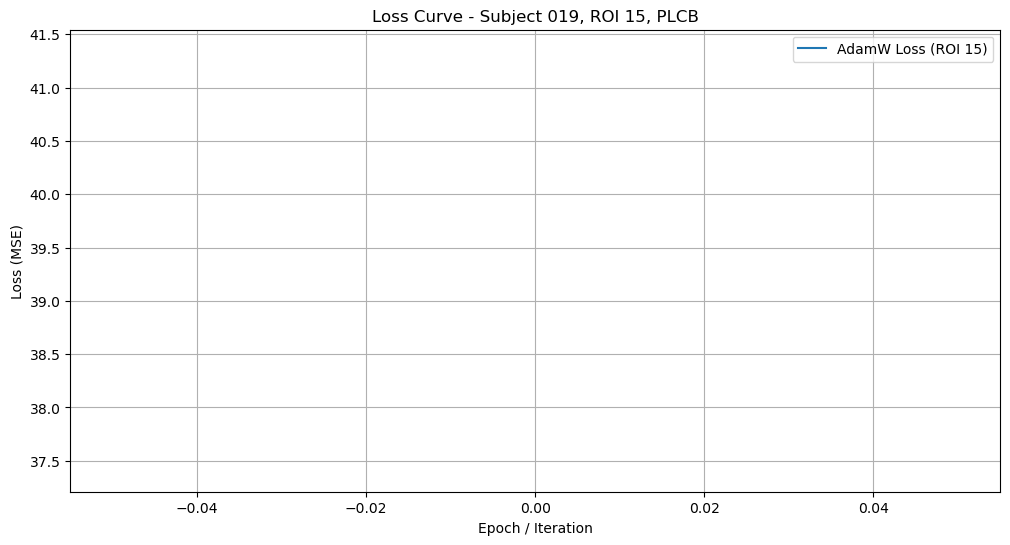

[I 2025-05-10 10:06:24,830] A new study created in memory with name: no-name-a263c7f4-327e-4350-8c2d-4e3ba7a9a99b


=== Torch Optimisation Evaluation Results ===
MSE = 3.9376e+01, NMSE = 5.7179e-01, Relative Error = 7.5617e-01
Explained Variance = 0.2795
Pearson Correlation = 0.3962, Cross-Correlation = 0.3962
Coherence = 0.4737, KL Divergence = 4.9827e-01
=== Torch Optimisation Evaluation Results ===
MSE = 1.2028e+00, NMSE = 5.9757e-01, Relative Error = 7.7302e-01
Explained Variance = 0.4019
Pearson Correlation = 0.3962, Cross-Correlation = 0.3962
Coherence = 0.4737, KL Divergence = 4.9827e-01

=== Running P-DCM for Subject 019, ROI 16, Condition: LSD ===


[I 2025-05-10 10:06:46,387] Trial 0 finished with value: 48.904815673828125 and parameters: {'phi': 1.7130327474950313, 'varphi': 0.23601252950469176, 'chi': 0.28691434646341096, 'tMTT': 4.680495183262149, 'tau': 5.796894085179844, 'sigma': 1.857104841837339, 'mu': 1.6432190580882242, 'lamb': 0.07722504063168217, 'alpha_v': 18.219501104934327, 'beta_v': 1.8597616725817272, 'alpha_e': 13.270763497944426, 'beta_e': 2.864476704090539}. Best is trial 0 with value: 48.904815673828125.
[I 2025-05-10 10:07:07,130] Trial 1 finished with value: 43.495113372802734 and parameters: {'phi': 1.1878110227117498, 'varphi': 0.9558951911640157, 'chi': 0.8992186680361032, 'tMTT': 3.0079078946300983, 'tau': 7.131151704450286, 'sigma': 0.866592702503662, 'mu': 1.5267830933765916, 'lamb': 0.15312932992401748, 'alpha_v': 8.810505702162986, 'beta_v': 1.0682374107644221, 'alpha_e': 0.19590146566061425, 'beta_e': 3.543172505888435}. Best is trial 1 with value: 43.495113372802734.
[I 2025-05-10 10:07:30,375] Tri

[Epoch 0] Loss: 33.615509


<Figure size 640x480 with 0 Axes>

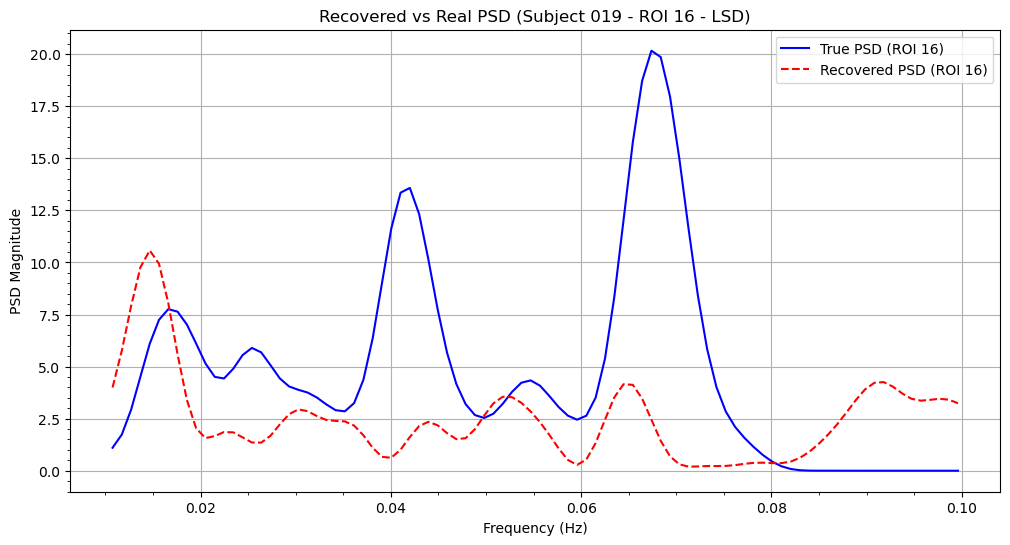

<Figure size 640x480 with 0 Axes>

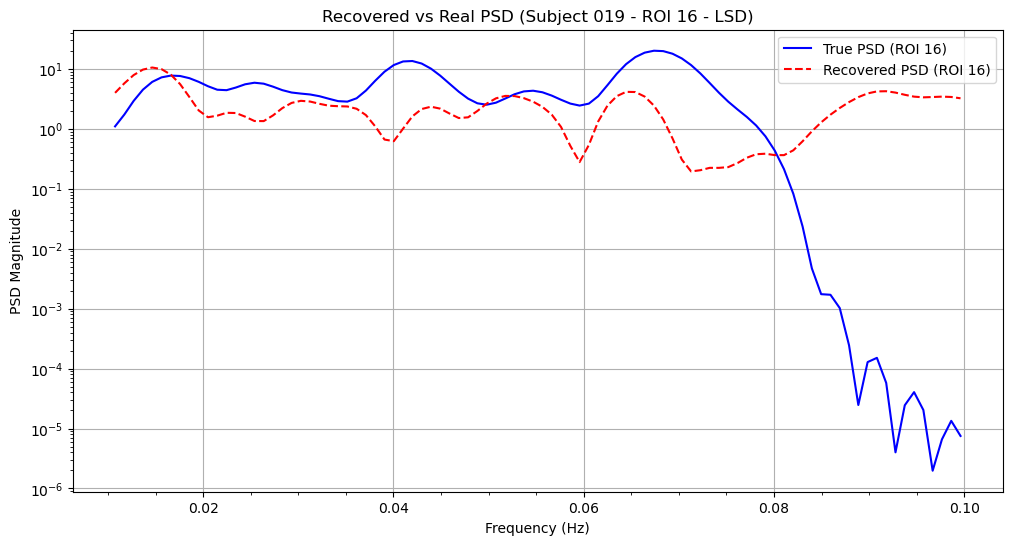

<Figure size 640x480 with 0 Axes>

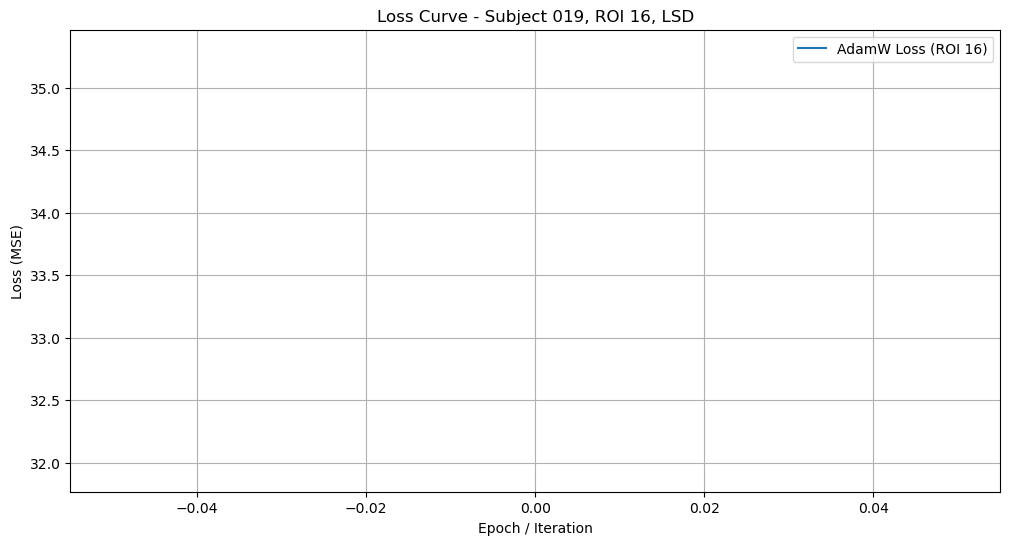

[I 2025-05-10 10:21:42,252] A new study created in memory with name: no-name-e046262d-1008-410e-8e9f-36867ab73215


=== Torch Optimisation Evaluation Results ===
MSE = 3.3616e+01, NMSE = 7.2138e-01, Relative Error = 8.4934e-01
Explained Variance = 0.2650
Pearson Correlation = -0.0273, Cross-Correlation = -0.0273
Coherence = 0.2816, KL Divergence = 9.0209e-01
=== Torch Optimisation Evaluation Results ===
MSE = 2.0697e+00, NMSE = 1.0444e+00, Relative Error = 1.0220e+00
Explained Variance = 0.0316
Pearson Correlation = -0.0273, Cross-Correlation = -0.0273
Coherence = 0.2816, KL Divergence = 9.0209e-01

=== Running P-DCM for Subject 019, ROI 16, Condition: PLCB ===


[I 2025-05-10 10:21:58,486] Trial 0 finished with value: 57.31718826293945 and parameters: {'phi': 1.3145932763037513, 'varphi': 0.48134419465825407, 'chi': 0.7549321916407159, 'tMTT': 3.699809322085364, 'tau': 30.116431699868112, 'sigma': 1.0638316186531915, 'mu': 1.1756494527860677, 'lamb': 0.015178150297633091, 'alpha_v': 3.1462097267714446, 'beta_v': 4.9246901067615685, 'alpha_e': 5.797933430154361, 'beta_e': 2.6888766997379108}. Best is trial 0 with value: 57.31718826293945.
[I 2025-05-10 10:22:17,085] Trial 1 finished with value: 50.975318908691406 and parameters: {'phi': 1.8918492012678552, 'varphi': 0.6299543608189758, 'chi': 0.2346953666748509, 'tMTT': 5.305783108401947, 'tau': 30.39539895598113, 'sigma': 1.6046515811357707, 'mu': 1.2182081897598727, 'lamb': 0.11587742885124808, 'alpha_v': 10.16956369814266, 'beta_v': 2.408889992775124, 'alpha_e': 17.04625179844105, 'beta_e': 0.651494985169513}. Best is trial 1 with value: 50.975318908691406.
[I 2025-05-10 10:22:31,193] Trial 

[Epoch 0] Loss: 13.760108


<Figure size 640x480 with 0 Axes>

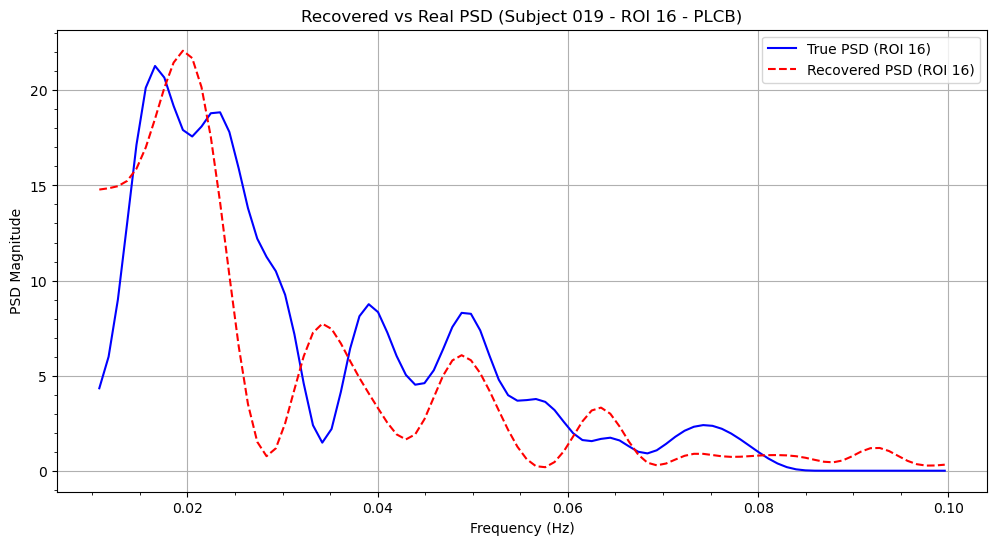

<Figure size 640x480 with 0 Axes>

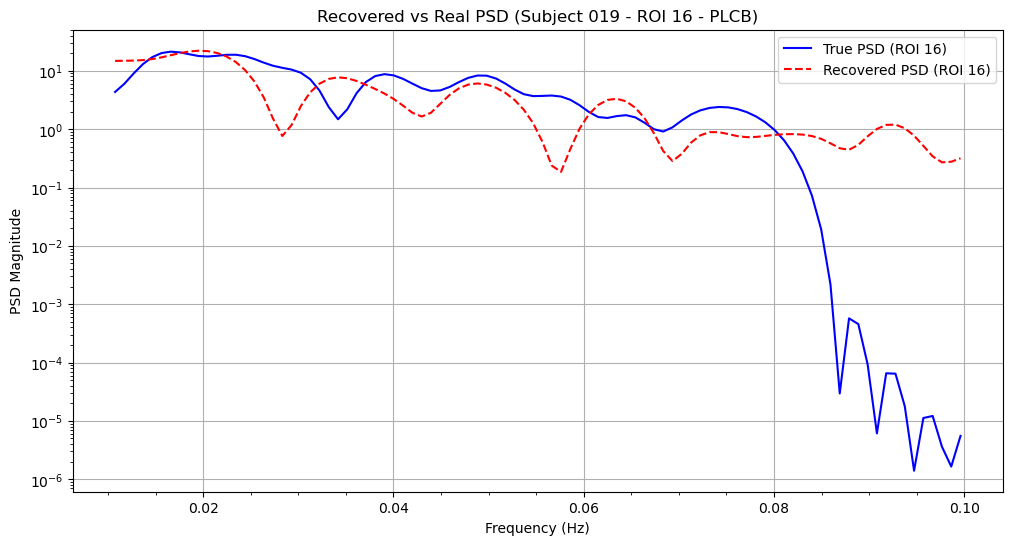

<Figure size 640x480 with 0 Axes>

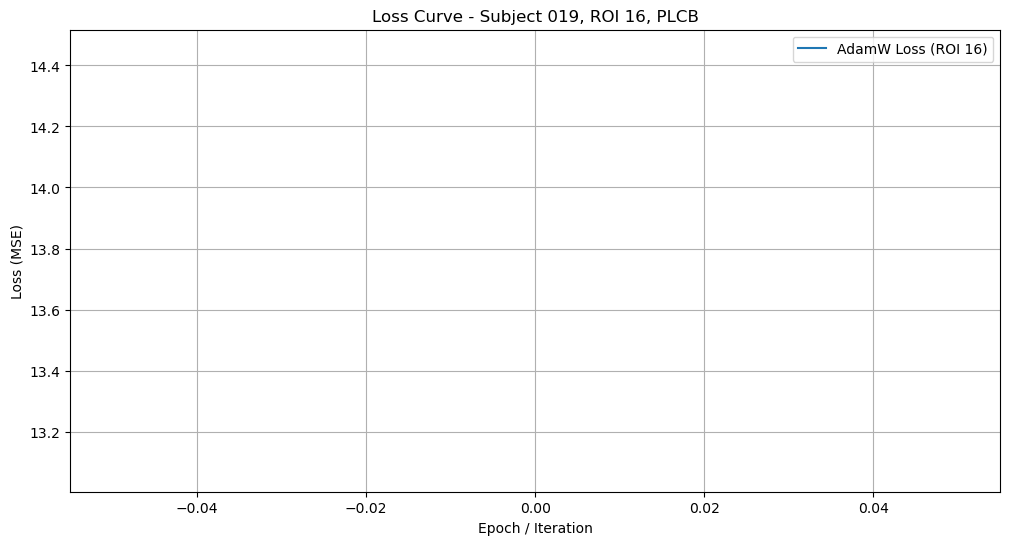

[I 2025-05-10 10:37:03,574] A new study created in memory with name: no-name-0c22725c-34b2-4eb0-b0ee-dafcbdf43986


=== Torch Optimisation Evaluation Results ===
MSE = 1.3760e+01, NMSE = 2.0452e-01, Relative Error = 4.5224e-01
Explained Variance = 0.8078
Pearson Correlation = 0.8218, Cross-Correlation = 0.8218
Coherence = 0.7968, KL Divergence = 2.9153e-01
=== Torch Optimisation Evaluation Results ===
MSE = 3.7136e-01, NMSE = 2.0497e-01, Relative Error = 4.5274e-01
Explained Variance = 0.8069
Pearson Correlation = 0.8218, Cross-Correlation = 0.8218
Coherence = 0.7968, KL Divergence = 2.9153e-01

=== Running P-DCM for Subject 019, ROI 17, Condition: LSD ===


[I 2025-05-10 10:37:29,136] Trial 0 finished with value: 38.683876037597656 and parameters: {'phi': 1.8445834166396775, 'varphi': 0.8095918012274879, 'chi': 0.20510896544430715, 'tMTT': 1.5846226930894398, 'tau': 4.6817095446241765, 'sigma': 1.1499879024929127, 'mu': 0.3459517365004423, 'lamb': 0.09363881545427982, 'alpha_v': 10.513158467061105, 'beta_v': 2.6250726180549315, 'alpha_e': 10.301899633654127, 'beta_e': 0.9549730728781233}. Best is trial 0 with value: 38.683876037597656.
[I 2025-05-10 10:37:49,722] Trial 1 finished with value: 24.297840118408203 and parameters: {'phi': 1.452976278206965, 'varphi': 0.4182509634097243, 'chi': 0.3831962725408404, 'tMTT': 3.0234637613228705, 'tau': 29.42925296686035, 'sigma': 0.5654895464921545, 'mu': 1.411538219478345, 'lamb': 0.1465726100986946, 'alpha_v': 16.877203633770698, 'beta_v': 1.3814296314144696, 'alpha_e': 2.6796449206680024, 'beta_e': 2.5031823104389948}. Best is trial 1 with value: 24.297840118408203.
[I 2025-05-10 10:38:13,292] T

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from PDCM.PDCMBOLDModel import PDCMMODEL
from euler_maruyama import euler_maruyama_solver  # or import directly from your module


device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = PDCMMODEL(device=device)

# Set parameters (adjust if needed)
model.set_params(
    sigma=0.5, mu=0.4, lamb=0.2,
    phi=1.5, chi=0.6, varphi=0.6,
    mtt=2.0, tau=4.0
)

# Simulation time
T = 60.0  # total seconds
h = 0.01
time = torch.arange(0, T, h, device=device)

# Initial state values
var_init = (
    torch.tensor(0.0, device=device),  # xE
    torch.tensor(0.0, device=device),  # xI
    torch.tensor(0.0, device=device),  # a
    torch.tensor(1.0, device=device),  # f
    torch.tensor(1.0, device=device),  # v
    torch.tensor(1.0, device=device),  # q
    torch.tensor(1.0, device=device),  # fout
    torch.tensor(0.4, device=device),  # E
    torch.tensor(0.0, device=device)   # y
)

# Run simulation
(
    u_full, xE, xI, a, f, v, q, fout, E, y, t_full
) = euler_maruyama_solver(
    func=model,
    t=time,
    h=h,
    var_init=var_init,
    indicator=False,
    alpha_v=1.0,
    beta_v=1.0,
    alpha_e=1.0,
    beta_e=1.0,
    add_state_noise=False,
    add_obs_noise=False,
    add_stimulus=True,  
    select=False
)


t_np = t_full.cpu().numpy()
f_np = f.cpu().numpy()
v_np = v.cpu().numpy()
u_np = u_full.cpu().numpy()


plt.figure(figsize=(12, 6))
plt.plot(t_np, f_np, label='CBF (f)', color='blue')
plt.plot(t_np, v_np, label='CBV (v)', color='green')
plt.plot(t_np, u_np, label='Stimulus (u)', color='red', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Signal Value')
plt.title('CBF, CBV, and Stimulus over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
